In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  
from matplotlib import patches
from astropy.utils import data
data.conf.remote_timeout = 60
#from spectral_cube import SpectralCube

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from random import randint
from astropy.wcs import WCS
import cleaners as c
import beambar as bb
import mass as mass

In [2]:
loc = 'data/'
vers = 'pbcorr' 
name= '_J1059_09_HI.image'
fullname = loc+vers+name
ext = '.fits'
image = ''
mom0 = '_mom0'
mom1 = '_mom1'
mask = '_mask'
mod = '_3D'
out = 'subcubes/'
S1_mod = fullname+mom0+'_S1'+mod
S2_mod = fullname+mom0+'_S2'+mod
S3_mod = fullname+mom0+'_S3'+mod
S4_mod = fullname+mom0+'_S4'+mod
S5_mod = fullname+mom0+'_S5'+mod
S6_mod = fullname+mom0+'_S6'+mod
N1_mod = fullname+mom0+'_N1'+mod
N2_mod = fullname+mom0+'_N2'+mod
N3_mod = fullname+mom0+'_N3'+mod

S1_disk = loc + 'models/pbcorr_J1059_09_HI.image_S1.gauss_model_disk_mom0.fits'
S1_lead = loc + 'pbcorr_J1059_09_HI.image_S1.gauss_model_lead2_mom0.fits'
S1_follow = loc + 'pbcorr_J1059_09_HI.image_S1.gauss_model_follow2_mom0.fits'
S1_anom = loc + 'pbcorr_J1059_09_HI.image_mom0_S1.gauss_model_anom.fits'

S2_disk = loc + 'models/pbcorr_J1059_09_HI.image_S2.gauss_model_disk_mom0.fits'
S2_lead = loc + 'pbcorr_J1059_09_HI.image_S2.gauss_model_lead2_mom0.fits'
S2_follow = loc + 'pbcorr_J1059_09_HI.image_S2.gauss_model_follow2_mom0.fits'
S2_anom = loc + 'pbcorr_J1059_09_HI.image_mom0_S2.gauss_model_anom.fits'

S3_disk = loc + 'models/pbcorr_J1059_09_HI.image_S3.gauss_model_disk_mom0.fits'
S3_lead = loc + 'pbcorr_J1059_09_HI.image_S3.gauss_model_lead2_mom0.fits'
S3_follow = loc + 'pbcorr_J1059_09_HI.image_S3.gauss_model_follow2_mom0.fits'
S3_anom = loc + 'pbcorr_J1059_09_HI.image_mom0_S3.gauss_model_anom.fits'

S1237_anom = loc + 'pbcorr_J1059_09_HI.image_mom0_S1237.gauss_model_anom.fits'

outloc = loc+vers+name
optname = 'highresoptical'
modelloc = 'results/decomposition_S1237/gpy_maps/'
comps13 = 'results/decomposition_S3/gpy_maps/pbcorr_J1059_09_HI.image_S3_g+_fit_fin_sf-p2_component_map.fits'
rchi213 = 'results/decomposition_S3/gpy_maps/pbcorr_J1059_09_HI.image_S3_g+_fit_fin_sf-p2_rchi2_map.fits'
noise13 = 'results/decomposition_S3/gpy_maps/pbcorr_J1059_09_HI.image_S3_noise_map.fits'
comps = 'pbcorr_J1059_09_HI.image_S1237_p2_component_map.fits'
rchi2 = 'pbcorr_J1059_09_HI.image_S1237_p2_rchi2_map.fits'
noise = 'pbcorr_J1059_09_HI.image_S1237_noise_map.fits'

In [3]:
hdu_list = fits.open(fullname+image+ext)
hdu_list.info()
hdu0_list = fits.open(fullname+mom0+ext)
hdu0_list.info()
hdu1_list = fits.open(fullname+mom1+ext)
hdu1_list.info()
hdu2_list = fits.open(loc+optname+ext)
hdu2_list.info()
hdu3_list = fits.open(fullname+mask+ext) 
hdu3_list.info()
data_image = fits.getdata(fullname+image+ext)
header_image = fits.getheader(fullname+image+ext)
data_mom1 = fits.getdata(fullname+mom1+ext)
header_mom1 = fits.getheader(fullname+mom1+ext)
data_mom0 = fits.getdata(fullname+mom0+ext)
header_mom0 = fits.getheader(fullname+mom0+ext)
data_mask = fits.getdata(fullname+mask+ext)
header_mask = fits.getheader(fullname+mask+ext)
data_opt= fits.getdata(loc+optname+ext)
header_opt = fits.getheader(loc+optname+ext)
data_opt= fits.getdata(loc+optname+ext)
header_opt = fits.getheader(loc+optname+ext)

data_S1= fits.getdata(S1_mod+ext)
header_S1 = fits.getheader(S1_mod+ext)
data_S2= fits.getdata(S2_mod+ext)
header_S2 = fits.getheader(S2_mod+ext)
data_S3= fits.getdata(S3_mod+ext)
header_S3 = fits.getheader(S3_mod+ext)
data_S4= fits.getdata(S4_mod+ext)
header_S4 = fits.getheader(S4_mod+ext)
data_S5= fits.getdata(S5_mod+ext)
header_S5 = fits.getheader(S5_mod+ext)
data_S6= fits.getdata(S6_mod+ext)
header_S6 = fits.getheader(S6_mod+ext)
data_N1= fits.getdata(N1_mod+ext)
header_N1 = fits.getheader(N1_mod+ext)
data_N2= fits.getdata(N2_mod+ext)
header_N2 = fits.getheader(N2_mod+ext)
data_N3= fits.getdata(N3_mod+ext)
header_N3 = fits.getheader(N3_mod+ext)

data_S1_disk = fits.getdata(S1_disk)
header_S1_disk = fits.getheader(S1_disk)
data_S1_lead = fits.getdata(S1_lead)
header_S1_lead = fits.getheader(S1_lead)
data_S1_follow = fits.getdata(S1_follow)
header_S1_follow = fits.getheader(S1_follow)
data_S1_anom = fits.getdata(S1_anom)
header_S1_anom = fits.getheader(S1_anom)

data_S2_disk = fits.getdata(S2_disk)
header_S2_disk = fits.getheader(S2_disk)
data_S2_lead = fits.getdata(S2_lead)
header_S2_lead = fits.getheader(S2_lead)
data_S2_follow = fits.getdata(S2_follow)
header_S2_follow = fits.getheader(S2_follow)
data_S2_anom = fits.getdata(S2_anom)
header_S2_anom = fits.getheader(S2_anom)

data_S3_disk = fits.getdata(S3_disk)
header_S3_disk = fits.getheader(S3_disk)
data_S3_lead = fits.getdata(S3_lead)
header_S3_lead = fits.getheader(S3_lead)
data_S3_follow = fits.getdata(S3_follow)
header_S3_follow = fits.getheader(S3_follow)
data_S3_anom = fits.getdata(S3_anom)
header_S3_anom = fits.getheader(S3_anom)

data_S1237_anom = fits.getdata(S1237_anom)
header_S1237_anom = fits.getheader(S1237_anom)

data_comps = fits.getdata(modelloc+comps)
header_comps = fits.getheader(modelloc+comps)
data_rchi2 = fits.getdata(modelloc+rchi2)
header_rchi2 = fits.getheader(modelloc+rchi2)
data_noise = fits.getdata(modelloc+noise)
header_noise = fits.getheader(modelloc+noise)

data_comps13 = fits.getdata(comps13)
header_comps13 = fits.getheader(comps13)
data_rchi213 = fits.getdata(rchi213)
header_rchi213 = fits.getheader(rchi213)
data_noise13 = fits.getdata(noise13)
header_noise13 = fits.getheader(noise13)

#print(type(data_S1_disk))
#print(data_S1_disk.shape)
print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)
print(type(data_opt))
print(data_opt.shape)
print(type(data_mask))
print(data_mask.shape)

Filename: data/pbcorr_J1059_09_HI.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     633   (2048, 2048, 189)   float32   
Filename: data/pbcorr_J1059_09_HI.image_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: data/pbcorr_J1059_09_HI.image_mom1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: data/highresoptical.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (20401, 20377)   float32   
Filename: data/pbcorr_J1059_09_HI.image_mask.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     780   (2048, 2048, 189)   int16   
<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(20377, 2040

In [4]:
dx = (5.555555555556*10**(-4)*3600)
dy = dx
Dl = 122
dv = 8544.9290-8539.4159
bmaj = 5.781529598630*10**(-3)*3600 
bmin = 4.197591503940*10**(-3)*3600
theta_radian = dx * np.pi / 180 /3600
rms = 0.35e-3*np.sqrt(189)
snr = 3*rms
Abeam = (np.pi*bmaj*bmin)/(4*np.log(2)*dx*dy)
# arc length = radius * angle
distance_Mpc = Dl * theta_radian
rms = np.sqrt(np.mean(data_mom0**2))
print(np.round(bmaj,2), np.round(bmin,2))
print(distance_Mpc) 
print(dx, dy)
print(np.round((2048*dx)/3600, 2))
print(dv)
print(Abeam)
NHI = (1.104*10**(24))*(data_mom0)*(bmaj*bmin)**(-1)
nhisnr = (1.104*10**(24))*(snr)*(bmaj*bmin)**(-1)
print(mass.galNHI(NHI))
print(mass.HI_mass(data_mom0,Dl,Abeam,dv))
print(rms, snr, nhisnr)
rms = np.sqrt(np.mean(data_mom0**2))
print(rms)

9.317472781017129e+19
11.08 $\pm$ 0.02  not log = 121222229410.49, 11.2
0.009365737691628106 0.014435113439110896 5.06688850011141e+19
0.009365737691628106


In [6]:
display = np.copy(data_rchi213)

for i in range(len(display[:,0])):
    for j in range(len(display[0,:])):
        if display[i,j] == 0:
            display[i,j] = math.nan
        if S3_copy[i,j] == 0.0:
            display[i,j] = math.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(display, cmap = 'seismic',vmin = 0, vmax = 2.5)

cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"$\chi^2_{red}", size=24)
#cbar.ax.set_yticklabels(['', '1','', '2','', '3',''])
cbar.ax.tick_params(labelsize=18)
#ax.contour(data_mom0, extent = (0, np.max(data_opt[0,:]), 0, np.max(data_opt[:,0])))

plt.savefig('rchi2_S13.pdf', bbox_inches='tight')

NameError: name 'S3_copy' is not defined

In [ ]:
cbar.set_label(r"Flux [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
ax.set_xlabel(f"Right Ascension [{cube.wcs.wcs.radesys}]",size=24)
ax.set_ylabel(f"Declination [{cube.wcs.wcs.radesys}]",size=24)
ax0 = ax.coords[1]
ax0.set_ticklabel(fontsize=18)
ax1 = ax.coords[0]
ax1.set_ticklabel(fontsize=18)

In [40]:
hdu = fits.PrimaryHDU(cropped_opt, header=header_opt)
hdu.writeto(outloc+'_'+optname+'_S1237'+ext, overwrite=True)

In [114]:
#890:1140,950:1150 S1237
#907:961,1211:1270 S4
#1100:1140,890:940 S5
#1130:1180,1065:1100 S6
#846:851,1247:1255 S9
#830:880,1100:1150 S10
#1370:1500,1160:1230 N1
#550:750,450:650 N2
#530:570,1010:1060 N3
#1970:2020,580:630 N4
#150:190,800:850 N5
#0:40,2000:2048 N6
#900:950,410:450 N7
#1345:1365,1760:1785 N8
#1268:1290,1138:1166 N9

full = np.copy(data_image)
for i in range(0,m):
    for j in range(0,l):
        flag = False
        if full1[i,j] < 7500 or full1[i,j] > 8550:
            flag = True
        if i > 40 and i < 1345 and j > 1270:
            flag = True
        if j < 450: 
            flag = True
        if i > 750 and i < 1970 and j > 500 and j < 890:
            flag = True
        if i > 1250 and j > 630 and j < 1138:
            flag = True
        if i > 1500 and j > 1138:
            flag = True
        if i > 1365 and j > 1230:
            flag = True
        if i > 40 and i < 530 and j > 850 and j < 2000:
            flag = True
        if i < 890 and i > 190 and j > 650 and j < 1010:
            flag = True
        if  i < 830 and j > 1060 and j < 2000:
            flag = True
        if j > 1345 and j < 1365 and i > 1760 and i <1785:
            flag = False

    
                
        if flag:
            full0[i,j] = 0.0
            full1[i,j] = math.nan  


In [7]:
full = np.copy(data_image)
full0 = np.copy(data_mom0)
full1= np.copy(data_mom1)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished


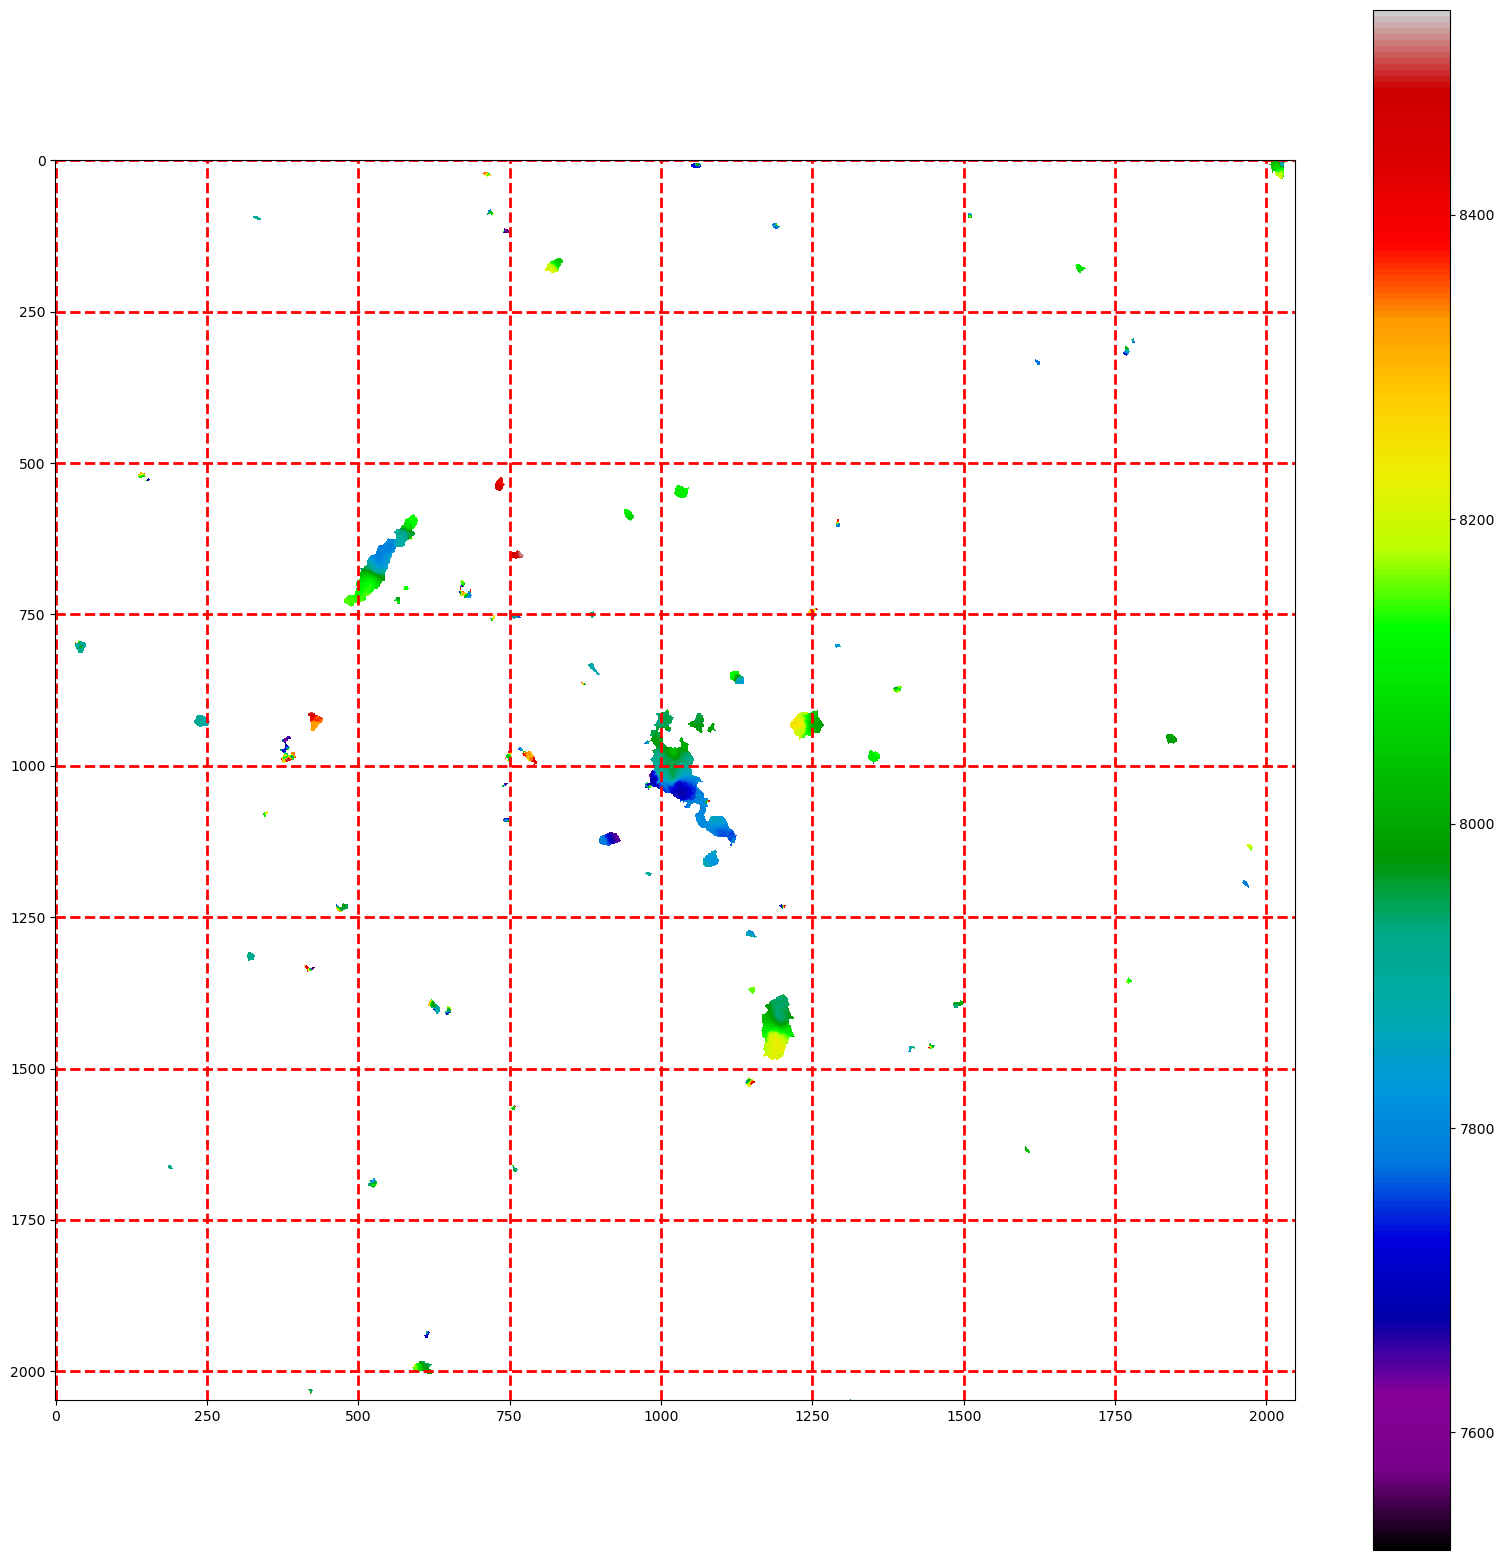

In [8]:
m = 2048
l = 2048
v = 188

c.cleanloop(full0,full1,full,m,l,v,7500,8550,5, nan = False)           
            
plt.figure(figsize = (20,20))
plt.imshow(full1, cmap='nipy_spectral')#, vmin=8550, vmax=8600)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [ ]:
#890:1140,950:1150 S1237
#907:961,1211:1270 S4
#1100:1140,890:940 S5
#1130:1180,1065:1100 S6
#846:851,1247:1255 S9
#830:880,1100:1150 S10
#1370:1500,1160:1230 N1
#550:750,450:650 N2
#530:570,1010:1060 N3
#1970:2020,580:630 N4
#150:190,800:850 N5
#0:40,2000:2048 N6
#900:950,410:450 N7
#1345:1365,1760:1785 N8
#1268:1290,1138:1166 N9

rect1 = patches.Rectangle((950,890), 200, 250, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((1211,907), 59, 54, linewidth=1, edgecolor='r', facecolor='none')
rect3 = patches.Rectangle((1065,1130), 50, 40, linewidth=1, edgecolor='r', facecolor='none')
rect4 = patches.Rectangle((1247,846), 35, 50, linewidth=1, edgecolor='r', facecolor='none')
rect5 = patches.Rectangle((1100,830), 50, 50, linewidth=1, edgecolor='r', facecolor='none')
rect6 = patches.Rectangle((1160,1370), 70, 130, linewidth=1, edgecolor='r', facecolor='none')
rect7 = patches.Rectangle((450,550), 200, 200, linewidth=1, edgecolor='r', facecolor='none')
rect8 = patches.Rectangle((1010,530), 50, 40, linewidth=1, edgecolor='r', facecolor='none')
rect9 = patches.Rectangle((580,1970), 50, 50, linewidth=1, edgecolor='r', facecolor='none')
rect10 = patches.Rectangle((800,150), 50, 40, linewidth=1, edgecolor='r', facecolor='none')
rect11 = patches.Rectangle((2000,0), 48, 40, linewidth=1, edgecolor='r', facecolor='none')
rect12 = patches.Rectangle((410,900), 40, 50, linewidth=1, edgecolor='r', facecolor='none')
rect13 = patches.Rectangle((1760,1345), 25, 20, linewidth=1, edgecolor='r', facecolor='none')
rect14 = patches.Rectangle((1138,1268), 28, 22, linewidth=1, edgecolor='r', facecolor='none')


# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)
ax.add_patch(rect6)
ax.add_patch(rect7)
ax.add_patch(rect8)
ax.add_patch(rect9)
ax.add_patch(rect10)
ax.add_patch(rect11)
ax.add_patch(rect12)
ax.add_patch(rect13)
ax.add_patch(rect14)

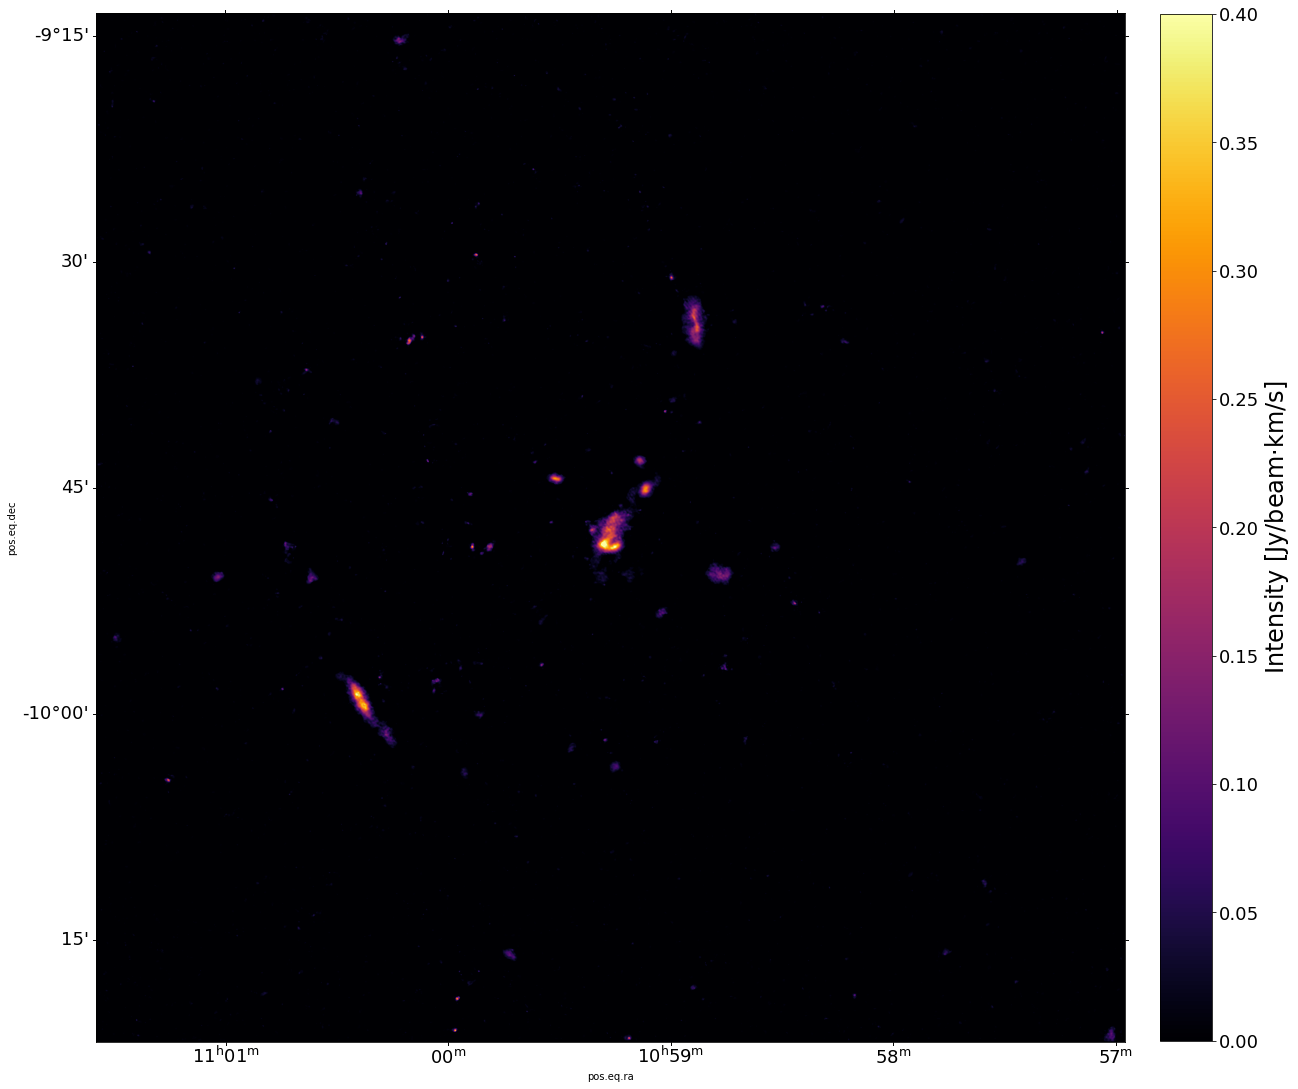

In [15]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(full0, cmap='inferno', vmin=0, vmax=0.4)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)



cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
ax0 = ax.coords[1]
ax0.set_ticklabel(fontsize=18)
ax1 = ax.coords[0]
ax1.set_ticklabel(fontsize=18)

#plt.savefig('mom0outhr.pdf', bbox_inches='tight')


In [34]:
hdu = fits.PrimaryHDU(full0, header=header_mom0)
hdu.writeto(outloc+mom0+'_cleaned'+ext, overwrite=True)
hdu = fits.PrimaryHDU(full1, header=header_mom1)
hdu.writeto(outloc+mom1+'_cleaned'+ext, overwrite=True)
hdu = fits.PrimaryHDU(full, header=header_image)
hdu.writeto(outloc+'_cleaned'+ext, overwrite=True)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned


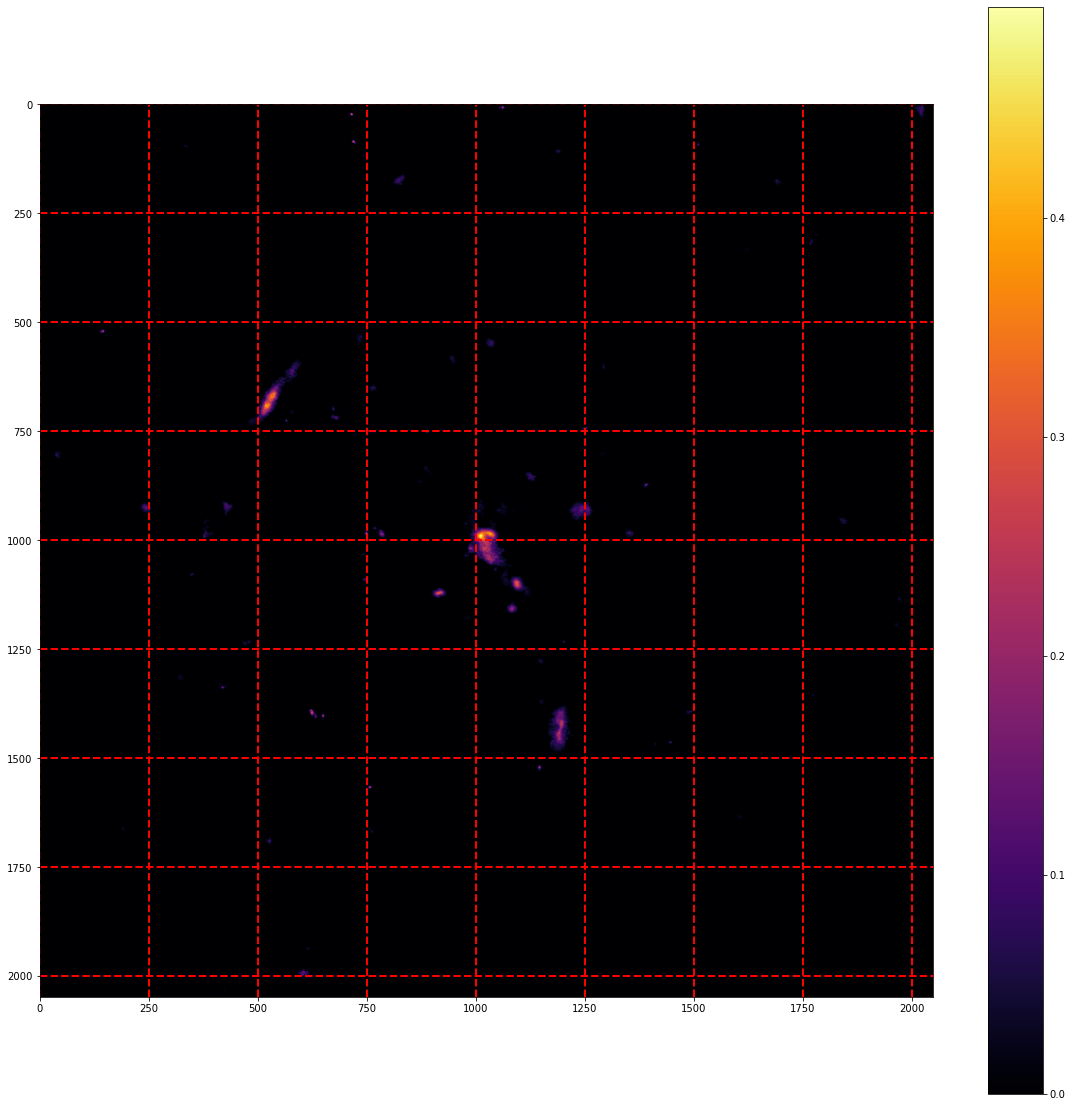

In [12]:
full = data_mom0[:,:]
full_1 = data_mom1[:,:]
full_cube = data_image[:,:,:]

full_copy = np.copy(full)
full_copy_mom1 = np.copy(full_1)
full_copy_cube = np.copy(full_cube)
m = 2048
l = 2048
v = 188
            
cleanloop(full_copy,full_copy_mom1,full_copy_cube,m,l,v,7500,8550,5)
                
plt.figure(figsize = (20,20))
plt.imshow(full_copy, cmap='inferno')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
10.57 $\pm$ 0.04  not log = 37228381328.97, 7.65
$ 4.1854 \pm 0.01 $  not log = 15324.82


invalid alternate code, keyword resembles SPECSYSa but isn't. [astropy.wcs.wcs]


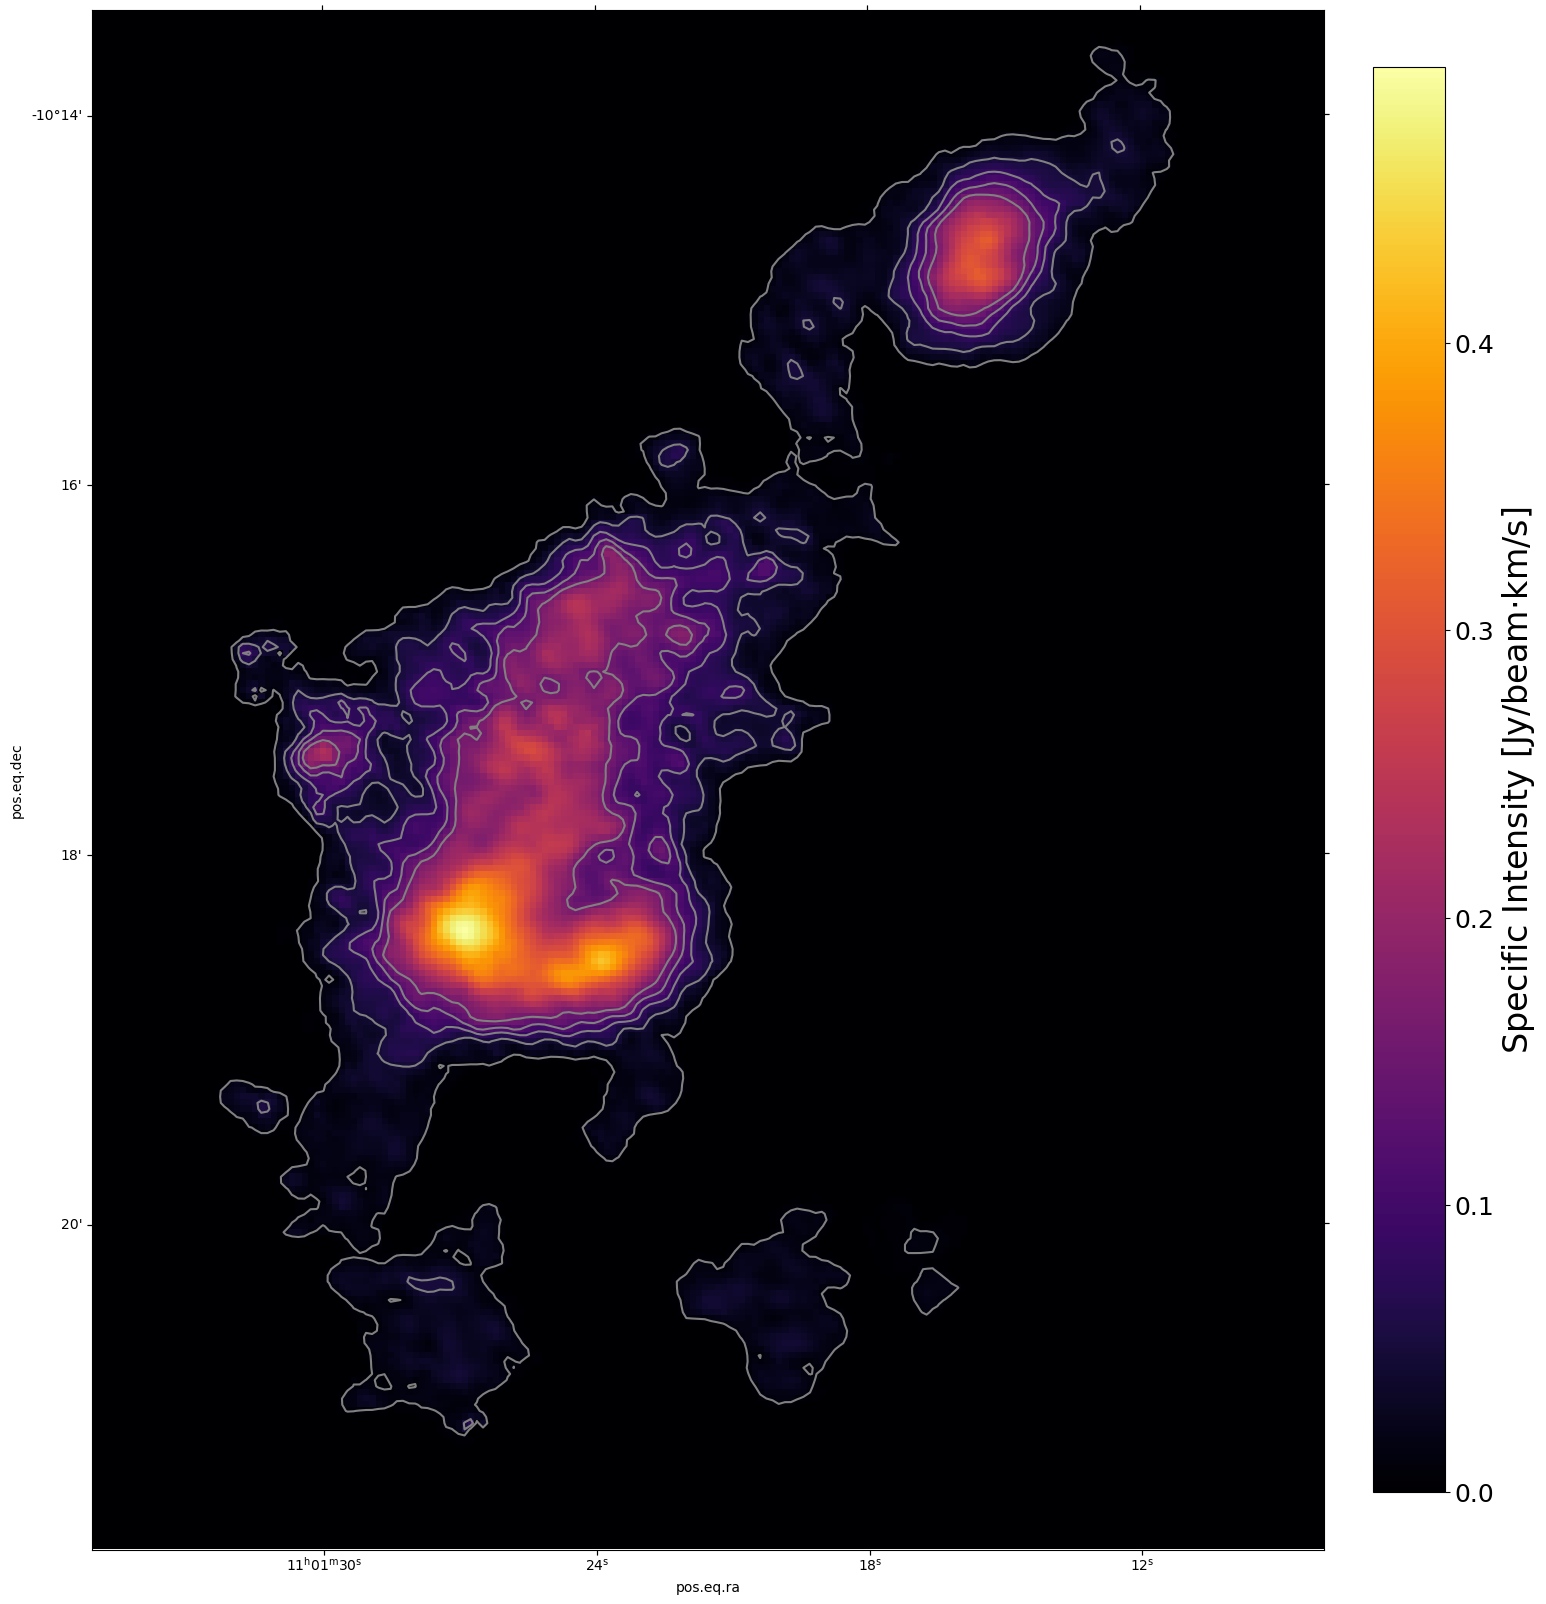

In [24]:
S1237 = data_mom0[890:1140,950:1150]
S1237_mom1 = data_mom1[890:1140,950:1150]
S1237_cube = data_image[:,890:1140,950:1150]

S1237_copy = np.copy(S1237)
S1237_copy_mom1 = np.copy(S1237_mom1)
S1237_copy_cube = np.copy(S1237_cube)
m = 250
l = 200
v = 188


for i in range(0,m):
    for j in range(0,l):
        flag = False
        if j > 150 and j < 175 and i > 200 and i < 250:
            flag = False
        if j < 5:
            flag = True
        if i > 247:
            flag = True
        if j > 197:
            flag = True
                
        if flag:
            S1237_copy[i,j] = 0.0
            S1237_copy_mom1[i,j] = math.nan  
            
cleanloop(S1237_copy,S1237_copy_mom1,S1237_copy_cube,m,l,v,7550,8100,5)
print(HI_mass(S1237_copy))
print(flux(S1237_copy))
#sigma = 0.9 
#S1237_copy = gaussian_filter(S1237_copy, sigma)
                
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'inferno')
ax.contour(S1237_copy, levels=[1.01e-2, 4.74e-2, 8.48e-2, 0.12, 0.16], colors = 'grey')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"Specific Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
#ax.contour(data_mom0, extent = (0, np.max(data_opt[0,:]), 0, np.max(data_opt[:,0])))


#plt.savefig('mom0_S1237.pdf', bbox_inches='tight')

invalid alternate code, keyword resembles SPECSYSa but isn't. [astropy.wcs.wcs]


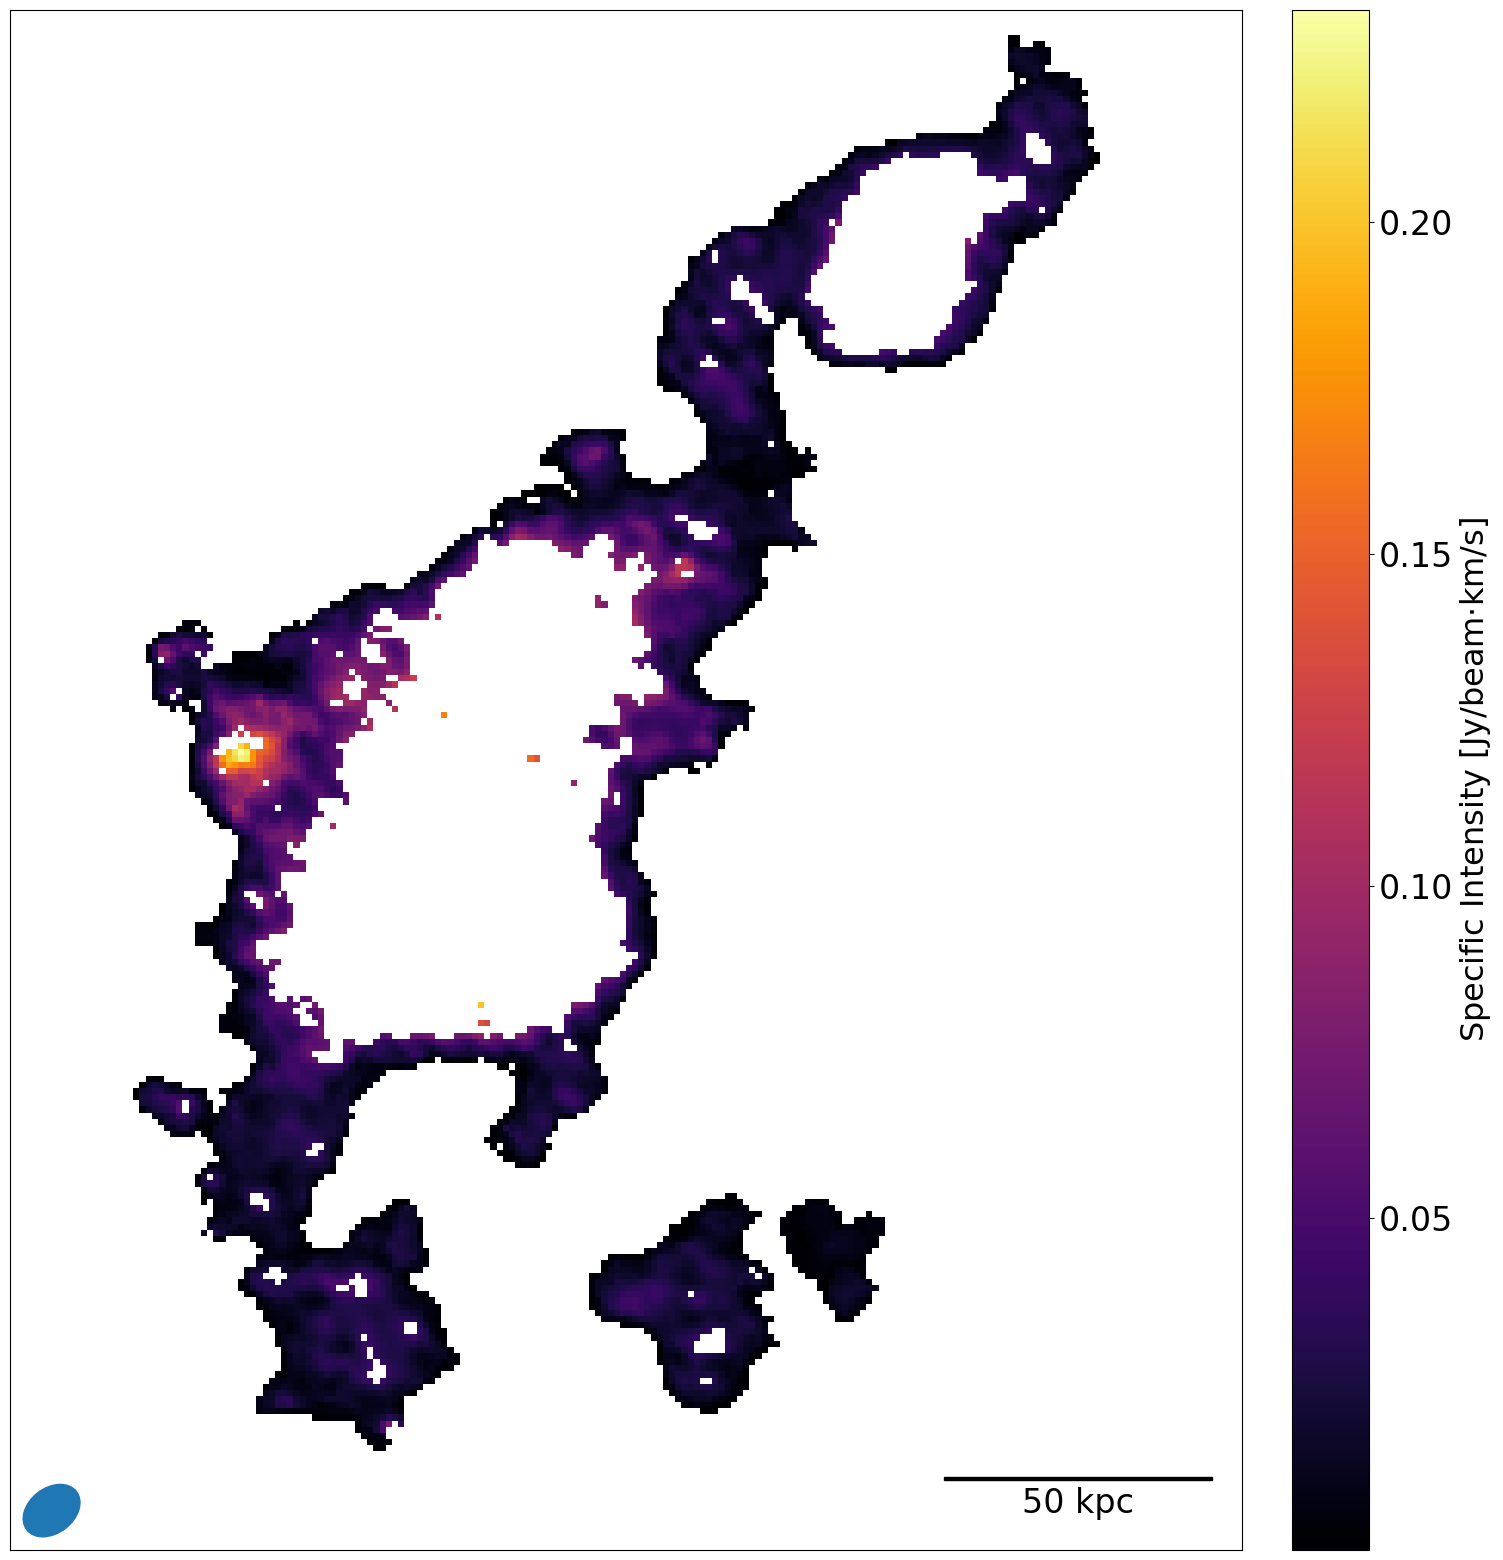

In [5]:
S1237_anom = data_S1237_anom[:]
S1237_anom_copy = np.copy(S1237_anom)

for i in range(0,200):
    for j in range(0,250):   
        if S1237_anom_copy[j,i] == 0.0:
            S1237_anom_copy[j,i] = math.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_anom_copy, cmap = 'inferno')
#ax.contour(S1237_copy, levels=[1.01e-2, 4.74e-2, 8.48e-2, 0.12, 0.16], colors = 'white')
bb.add_beam(ax, header = header_mom0)
bb.add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 24)

cbar = plt.colorbar(im,fraction=0.06, pad=0.032)
cbar.set_label(r"Specific Intensity [Jy/beam$\cdot$km/s]", size=23)
cbar.ax.tick_params(labelsize=24)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

#plt.savefig('mom0_anom_pres.png', bbox_inches='tight')

In [261]:
print('Interaction total mass = ' + HI_mass(S1237_copy))
print('Interaction NDAG mass = ' + HI_mass(data_S1237_anom))

Interaction total mass = 10.57 $\pm$ 0.04  not log = 37228381328.97, 7.65
Interaction NDAG mass = 9.89 $\pm$ 0.04  not log = 7833729499.9, 1.8


In [23]:
for i in range(0,200):
    for j in range(0,250):   
        if S1237_copy[j,i] == 0.0:
            S1237_copy[j,i] = math.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'inferno')
ax.contour(S1237_copy, levels=[1.01e-2, 4.74e-2, 8.48e-2, 0.12, 0.16], colors = 'white')
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 18)

cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"Specific Intensity [Jy/beam$\cdot$km/s]", size=24)
cbar.ax.tick_params(labelsize=18)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0_S1237.pdf', bbox_inches='tight')

NameError: name 'S1237_copy' is not defined

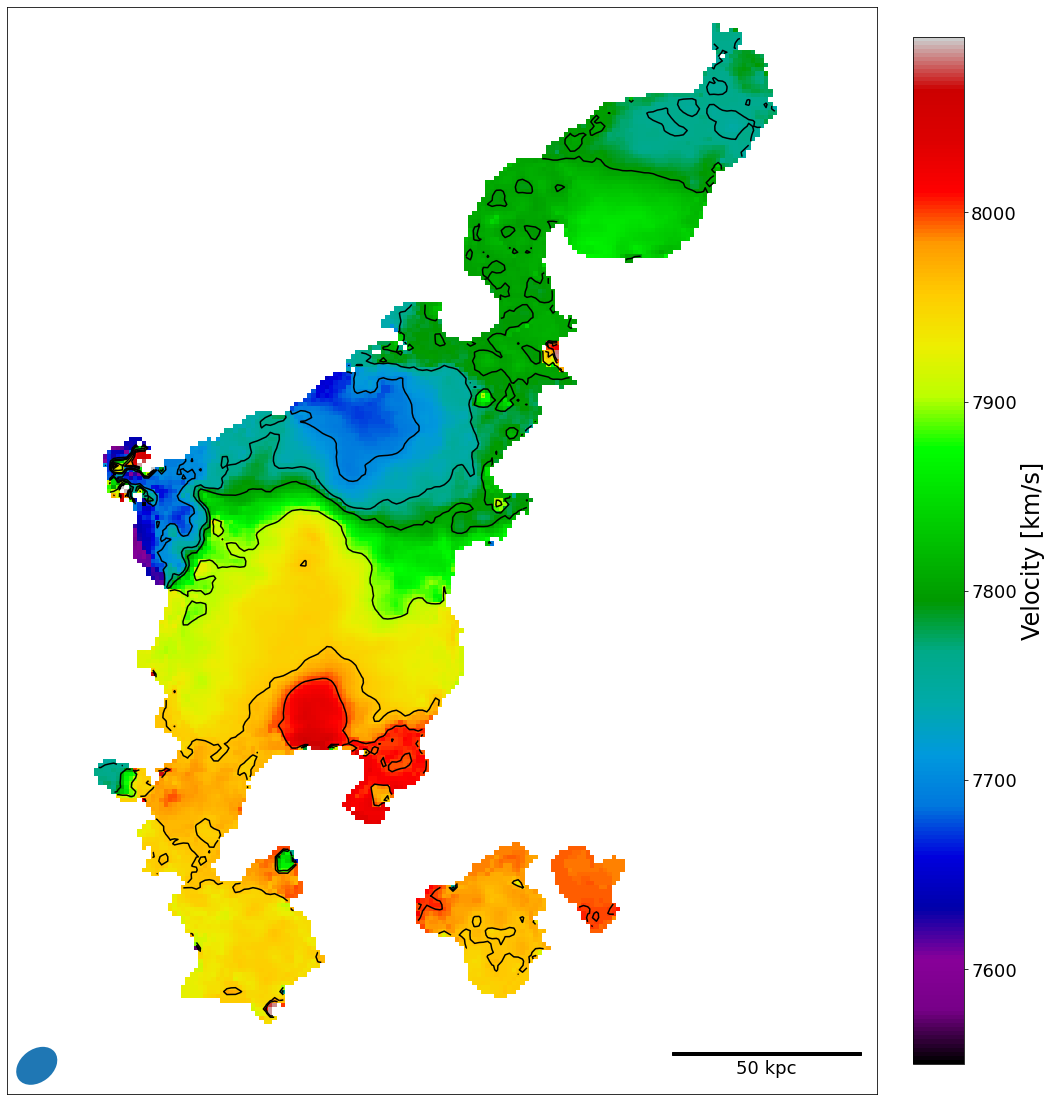

In [93]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy_mom1, cmap = 'nipy_spectral')
level = np.linspace(7600,8000,10)
ax.contour(S1237_copy_mom1,levels=[7700, 7760, 7800, 7900, 7960, 8000], colors = 'red')
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)
cbar.set_label(r"Velocity [km/s]", size=24)
cbar.ax.tick_params(labelsize=18)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 18)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

#print(level)

plt.savefig('mom1_S1237.pdf', bbox_inches='tight')

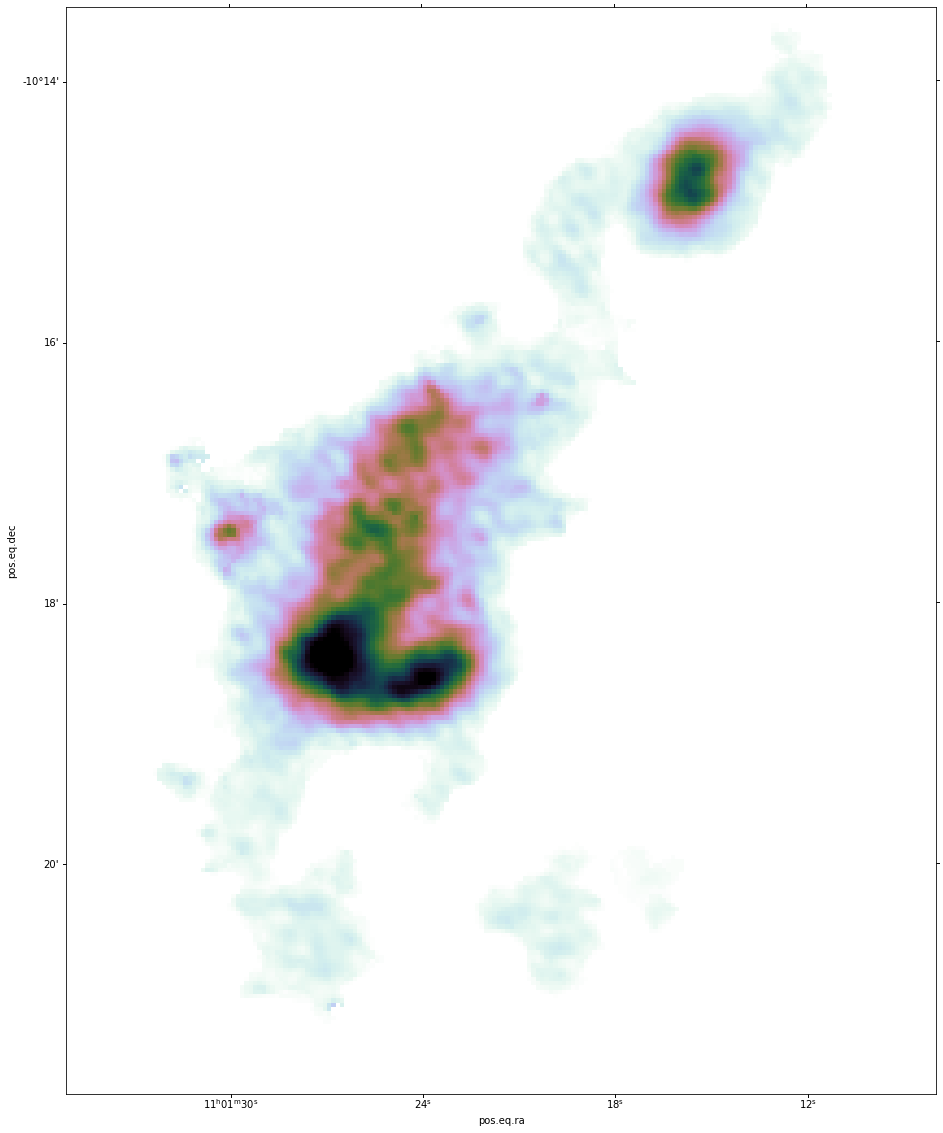

In [48]:
cropped_opt = data_opt[8900:11400,9400:11500]
#sigma = 0.9 
#S1237_copy = gaussian_filter(S1237_copy, sigma)
levels=[1.01e-2, 4.74e-2, 8.48e-2, 0.12, 0.16]
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'cubehelix_r',vmin = -0.0, vmax = 0.4)
#ax.contour(S1237_copy , extent = (0, len(cropped_opt[0,:]), 0, len(cropped_opt[:,0])))

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
8.96 $\pm$ 0.08  not log = 909680734.27, 0.48
$ 2.57341 \pm 0.02 $  not log = 374.46
8.162089827985246e+19


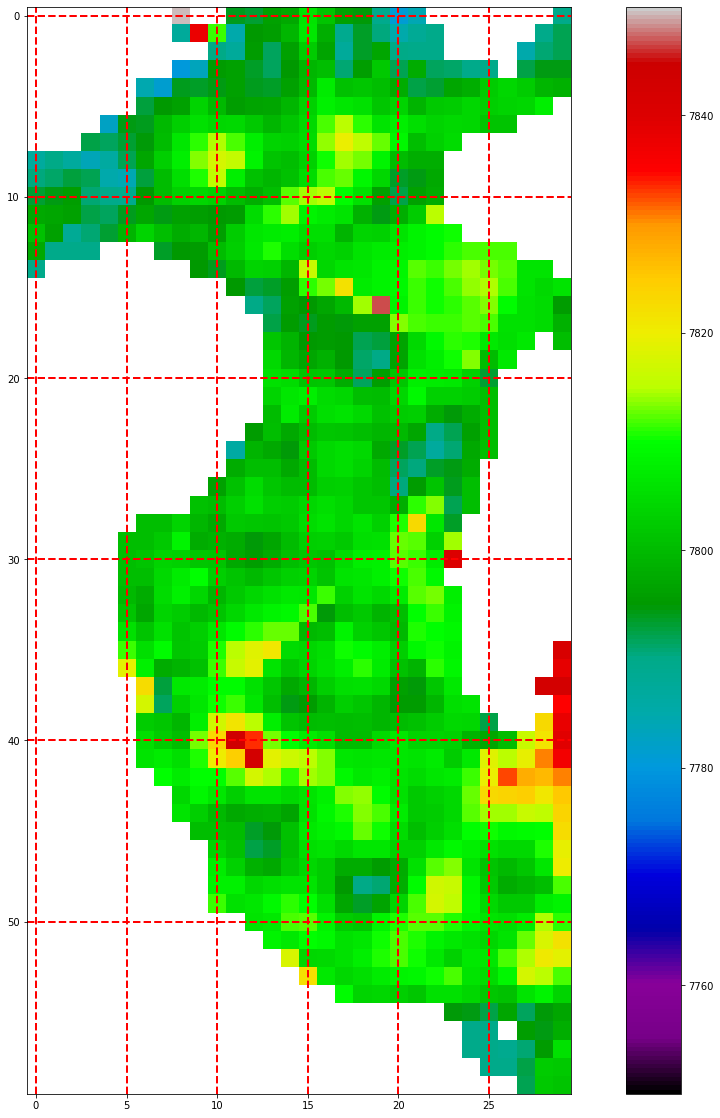

In [60]:
bridge = data_mom0[1050:1110,1050:1080]
bridge_mom1 = data_mom1[1050:1110,1050:1080]
bridge_cube = data_image[:,1050:1110,1050:1080]
NHI_bridge = NHI[1050:1110,1050:1080]

bridge_copy = np.copy(bridge)
bridge_copy_mom1 = np.copy(bridge_mom1)
bridge_copy_cube = np.copy(bridge_cube)
m = 60
l = 30
v = 188



            
cleanloop(bridge_copy,bridge_copy_mom1,bridge_copy_cube,m,l,v,7780,7850,5)
print(HI_mass(bridge_copy))
print(flux(bridge_copy))
print(galNHI(NHI_bridge))
                
plt.figure(figsize = (20,20))
plt.imshow(bridge_copy_mom1, cmap='nipy_spectral', vmin=7750, vmax=7850)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned


8.72 $\pm$ 0.09  not log = 520175142.32, 0.32


$ 2.33067 \pm 0.02 $  not log = 214.13


5.3455633970891735e+19




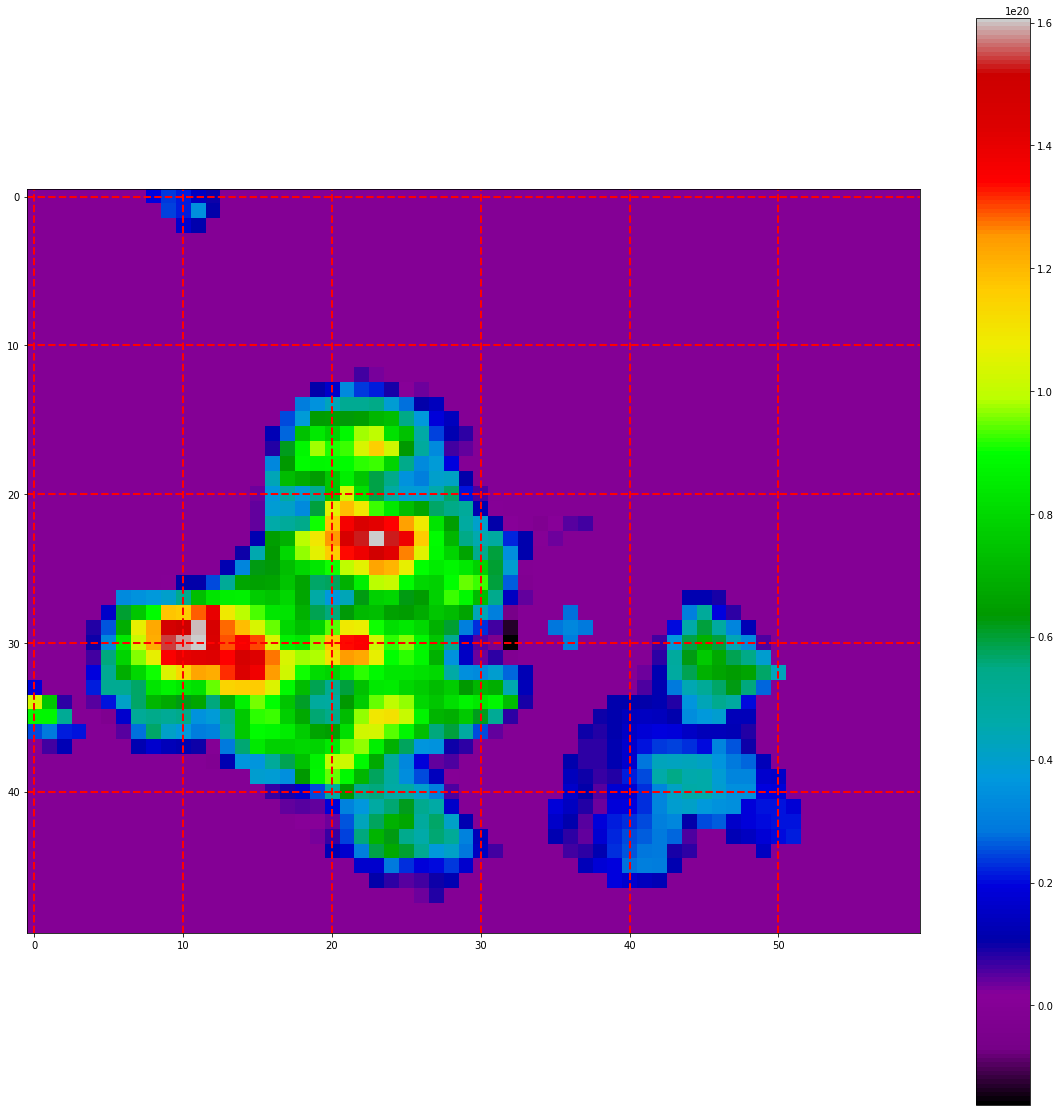

In [61]:
cloud = data_mom0[900:950,1040:1100]
cloud_mom1 = data_mom1[900:950,1040:1100]
cloud_cube = data_image[:,900:950,1040:1100]
NHI_cloud = NHI[900:950,1040:1100]

cloud_copy = np.copy(cloud)
cloud_copy_mom1 = np.copy(cloud_mom1)
cloud_copy_cube = np.copy(cloud_cube)
m = 50
l = 60
v = 188

for i in range(0,m):
    for j in range(0,l):
        flag = False
        if i < 5:
            flag = True

                
        if flag:
            cloud_copy[i,j] = 0.0
            cloud_copy_mom1[i,j] = math.nan  

            
cleanloop(cloud_copy,cloud_copy_mom1,cloud_copy_cube,m,l,v,7750,8100,5)

print('\n')

print(HI_mass(cloud_copy))
print('\n')
print(flux(cloud_copy))
print('\n')
print(galNHI(NHI_cloud))
print('\n')
                
plt.figure(figsize = (20,20))
plt.imshow(NHI_cloud, cmap='nipy_spectral')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
9.68 $\pm$ 0.09  not log = 4737241630.0, 2.51
$ 3.29005 \pm 0.03 $  not log = 1950.05
2.507736298956247e+20
bb mass = 9.52 $\pm$ 0.11  not log = 3333288288.68, 2.22


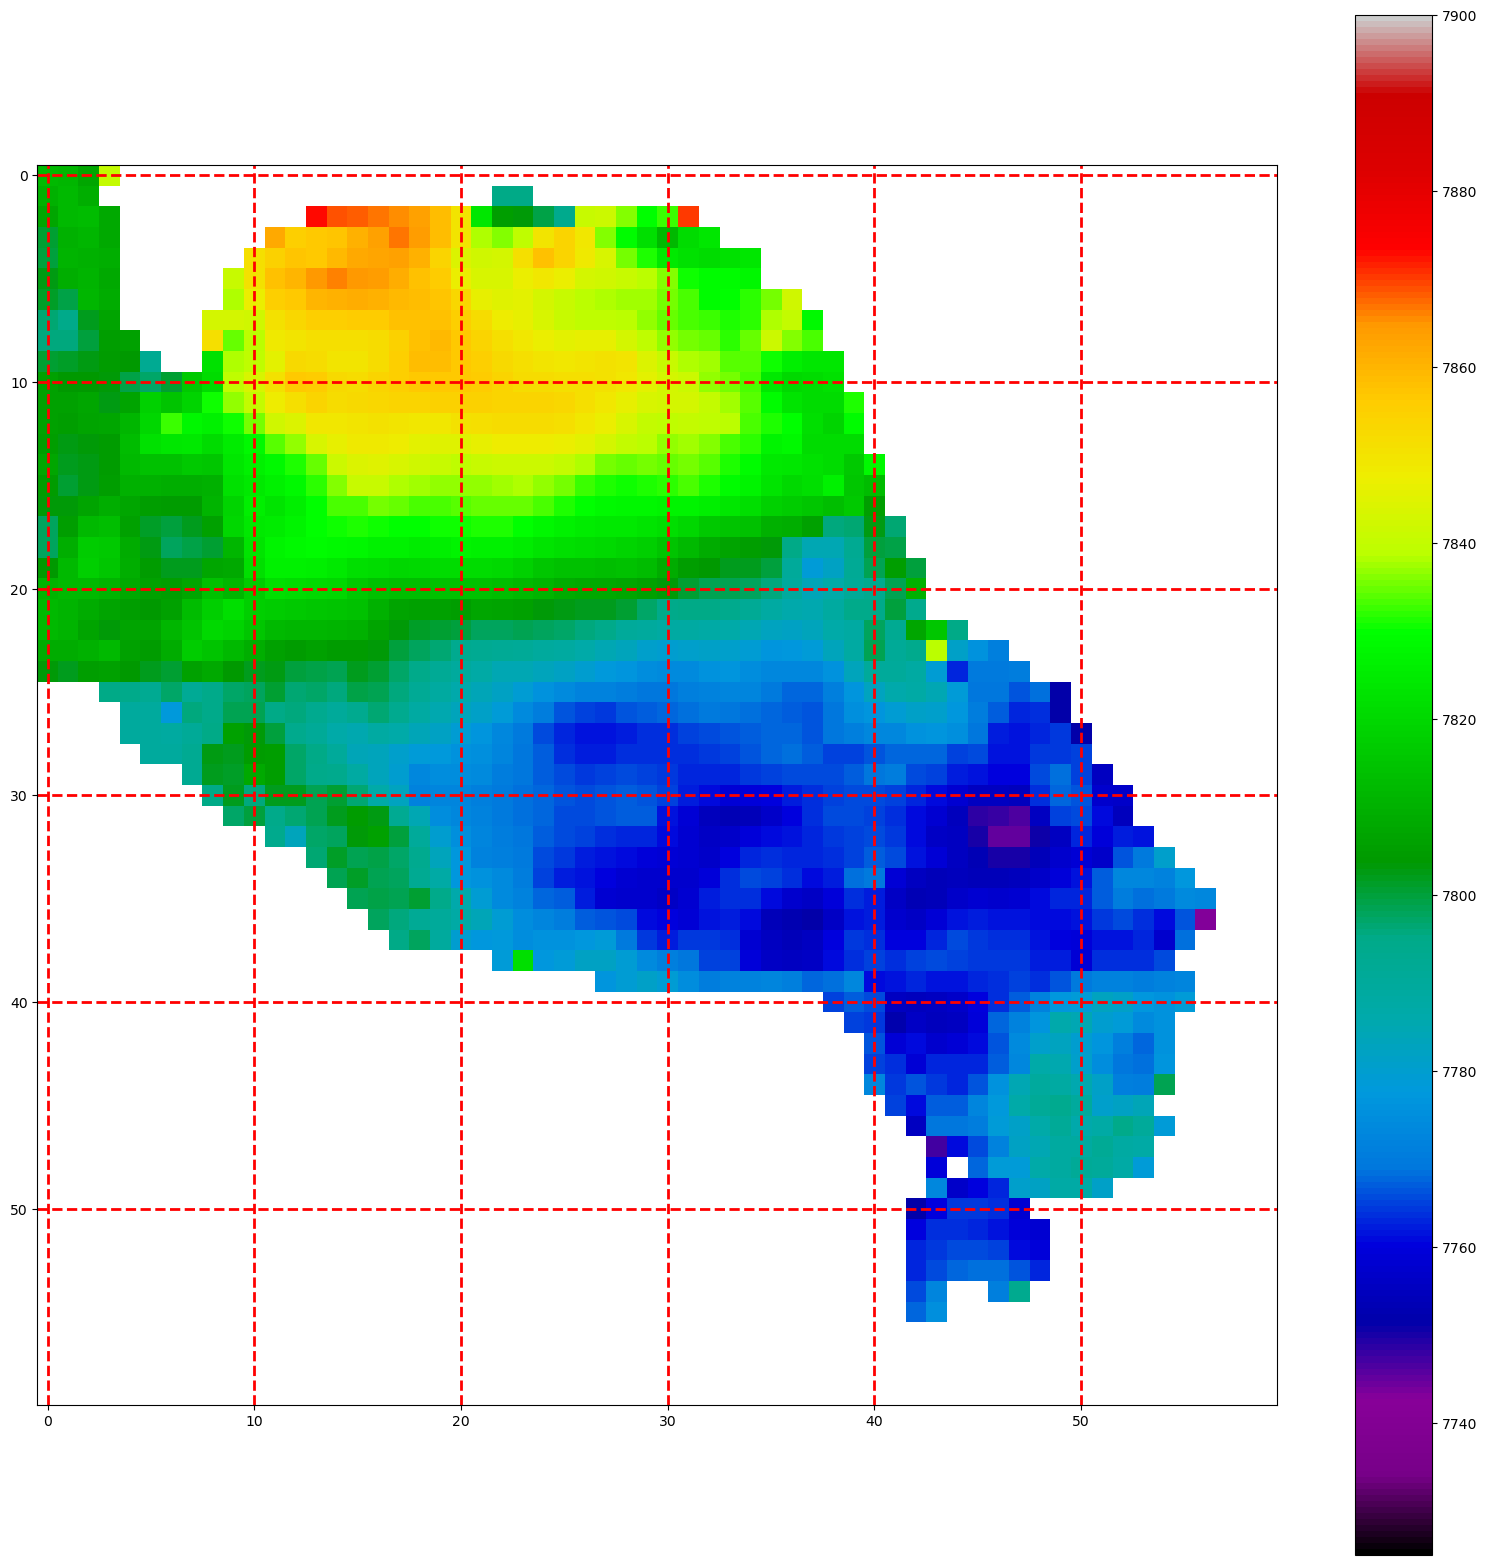

In [16]:
S2 = data_mom0[1080:1140,1070:1130]
S2_mom1 = data_mom1[1080:1140,1070:1130]
S2_cube = data_image[:,1080:1140,1070:1130]
S2_NHI = NHI[1080:1140,1070:1130]

S2_copy = np.copy(S2)
S2_copy_mom1 = np.copy(S2_mom1)
S2_copy_cube = np.copy(S2_cube)
m = 60
l = 60
v = 188

data_copy = np.copy(data_S2)


for i in range(0,m):
    for j in range(0,l):
        flag = False
        if i > 55:
            flag = True
                
        if flag:
            S2_copy[i,j] = 0.0
            S2_copy_mom1[i,j] = math.nan  
            
        data_copy[0,i,j] = data_copy[0,i,j]/1000
            
cleanloop(S2_copy,S2_copy_mom1,S2_copy_cube,m,l,v,7725,7900,5)

for i in range(0,m):
    for j in range(0,l):
        if S2_copy[i,j] == 0.0:
            S2_NHI[i,j] = 0.0

print(HI_mass(S2_copy))
print(flux(S2_copy))
print(galNHI(S2_NHI))
print('bb mass = ' + HI_mass(data_copy[0,:,:]))
                
plt.figure(figsize = (20,20))
plt.imshow(S2_copy_mom1, cmap='nipy_spectral', vmin=7725, vmax=7900)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
3.9963297656388007e+20


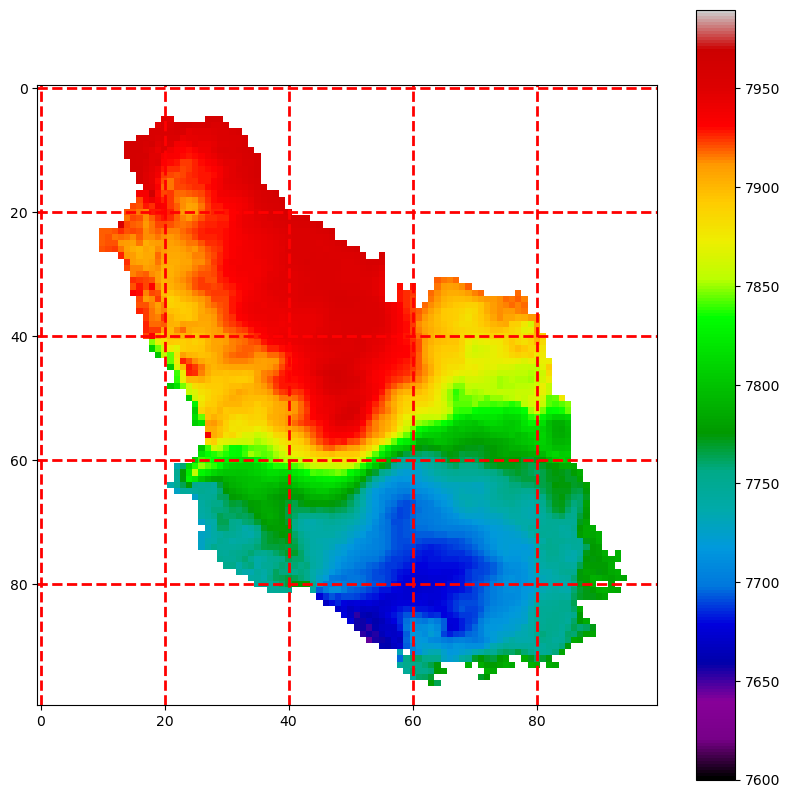

In [17]:
S3 = data_mom0[965:1065,970:1070]
S3_1 = data_mom1[965:1065,970:1070]
S3_cube = data_image[:,965:1065,970:1070]
S3_mask = data_mask[:,965:1065,970:1070]
S3_NHI = NHI[965:1065,970:1070]

m = 100
l = 100
v = 188

S3_copy = np.copy(S3)
S3_copy_mom1 = np.copy(S3_1)
S3_copy_cube = np.copy(S3_cube)
S3_copy_mask = np.copy(S3_mask)


for i in range(0,m):
    for j in range(0,l):
        flag = False
        if S3_copy[i,j] != 0.0:
              
            if S3_copy_mom1[i,j] < 7550 or S3_copy_mom1[i,j] > 8100:
                flag = True
            
            if j < 10 and i < 20:
                flag = True
            if j > 100 and i < 20:
                flag = True
            if i > 80 and j < 20:
                flag = True
                
            if i > 40 and i <= 60 and j< 40:
                if S3_copy_mom1[i,j] < 7800:
                    flag = True
            if i > 60 and j < 40:
                if S3_copy_mom1[i,j] < 7725:
                    flag = True
            
            if j > 60 and i < 40:
                if S3_copy_mom1[i,j] > 7920:
                    flag = True
                
            if j > 40 and i < 40:
                if S3_copy_mom1[i,j] > 7960:
                    flag = True
                
            if j > 80 and i < 30:
                flag = True
                
            if j > 20 and i < 20:
                if S3_copy_mom1[i,j] > 7960:
                    flag = True
                    
            if j > 40 and i < 10:
                flag = True
               
            if i < 5:
                if S3_copy_mom1[i,j] > 7940:
                    flag = True
                    
            if i > 80 or (j > 85 and i > 0):
                if S3_copy_mom1[i,j] > 7790:
                     flag = True
                    
            if i < 35 and j > 55:
                if S3_copy_mom1[i,j] > 7930:
                    flag = True
                    
            if j >= 98:
                flag = True
                
            if i >= 98:
                flag = True
            
            
                
        if flag:
            
            S3_copy[i,j] = 0.0
            S3_copy_mom1[i,j] = math.nan
        data_S3[0,i,j] = data_S3[0,i,j]/1000
        
#print(HI_mass(data_S3))
            

            
cleanloop(S3_copy,S3_copy_mom1,S3_copy_cube,m,l,v,7600,7990,5,nan=False)

#for i in range(0,m):
    #for j in range(0,l):
        #if S3_copy[i,j] == 0.0:
            #S3_NHI[i,j] = 0.0
#S3_new_mask = createmask(S3_copy_mask,S3_copy ,m,l,v)
#print('\n')
#print(HI_mass(S3_copy))
#print(flux(S3_copy))
print(galNHI(S3_NHI))
#print('\n')



        
#S3_new_mask = createmask(S3_copy_mask,S3_copy ,m,l,v)


plt.figure(figsize = (10,10))
plt.imshow(S3_copy_mom1, cmap='nipy_spectral', vmin=7600, vmax=7990)
plt.colorbar()
#plt.ylim(5,25)
#plt.xlim(15,80)
plt.grid(color='r', linestyle='--', linewidth=2)

NameError: name 'S3_copy' is not defined

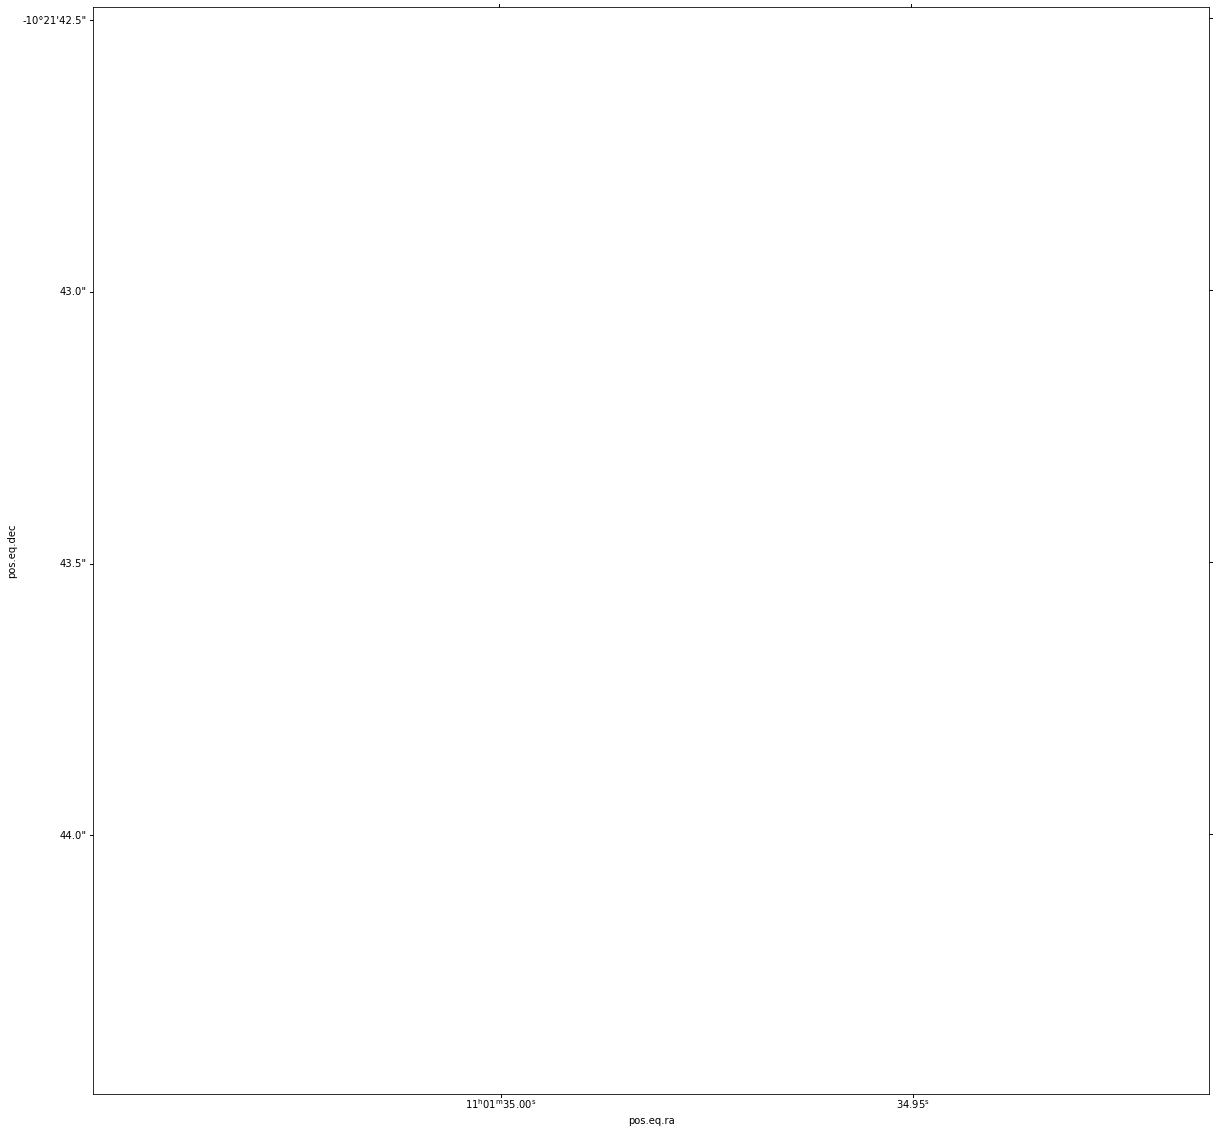

In [26]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S3_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 38)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0S3.png', bbox_inches='tight')

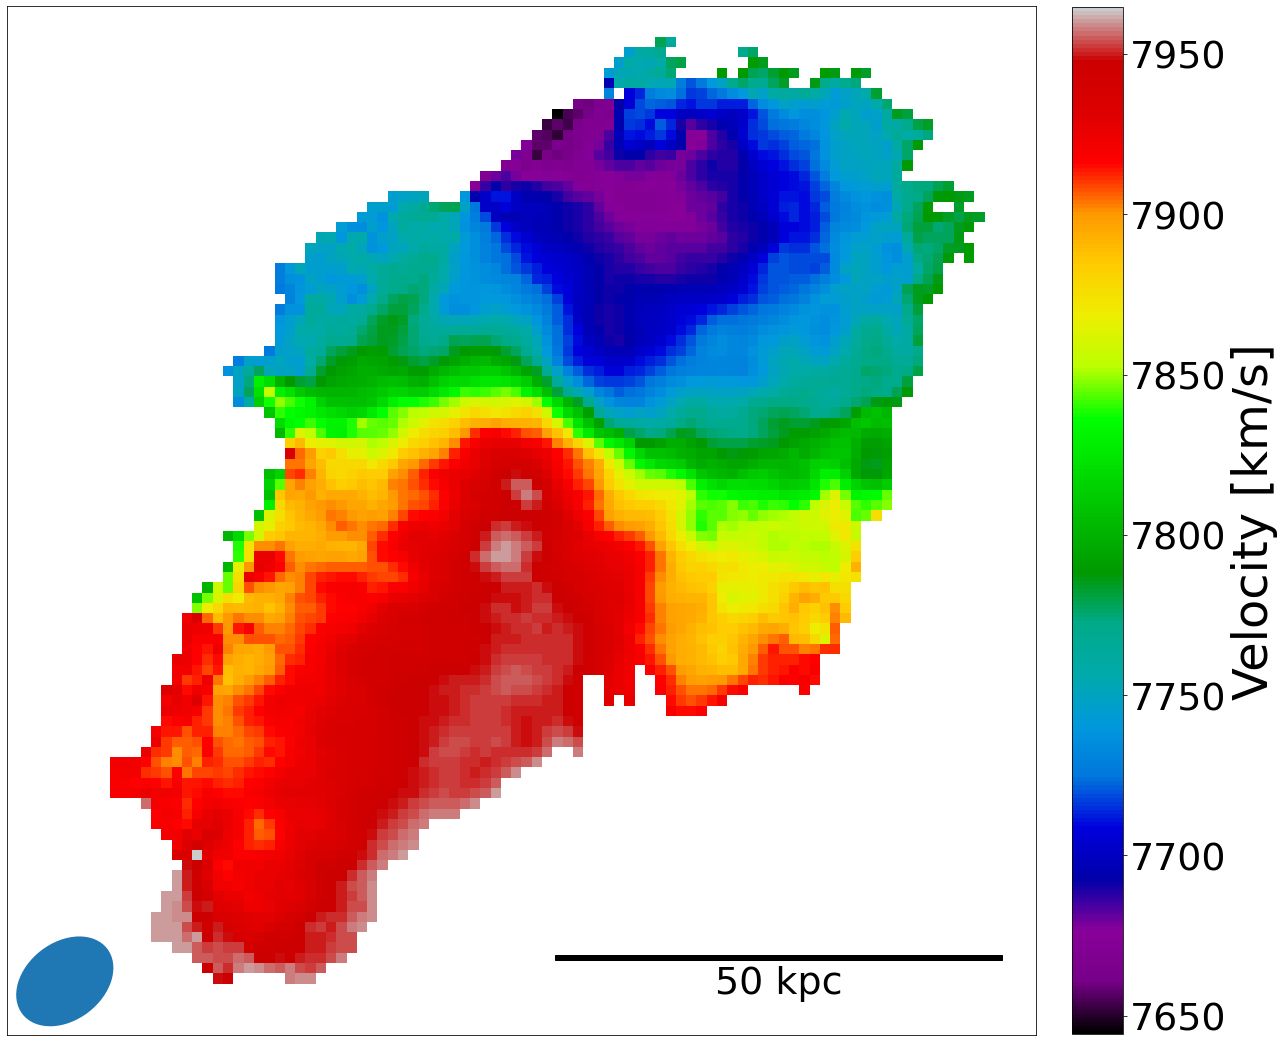

In [21]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S3_copy_mom1, cmap='nipy_spectral')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Velocity [km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 38)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom1S3.png', bbox_inches='tight')

In [65]:
print('S1 disk = ' + HI_mass(data_S1_disk))
print('S1 lead = ' + HI_mass(data_S1_lead))
print('S1 follow = ' + HI_mass(data_S1_follow))
print('S1 anom = ' + HI_mass(data_S1_anom))
print('\n')

print('S2 disk = ' + HI_mass(data_S2_disk))
print('S2 lead = ' + HI_mass(data_S2_lead))
print('S2 follow = ' + HI_mass(data_S2_follow))
print('S2 anom = ' + HI_mass(data_S2_anom))
print('\n')

print('S3 disk = ' + HI_mass(data_S3_disk))
print('S3 lead = ' + HI_mass(data_S3_lead))
print('S3 follow = ' + HI_mass(data_S3_follow))
print('S3 anom = ' + HI_mass(data_S3_anom))

S1 disk = 9.68 $\pm$ 0.01  not log = 4835313767.37, 0.31
S1 lead = 8.84 $\pm$ 0.02  not log = 684173294.14, 0.11
S1 follow = 8.32 $\pm$ 0.03  not log = 208539545.28, 0.04
S1 anom = 7.92 $\pm$ 0.24  not log = 82408738.96, 0.14


S2 disk = 9.55 $\pm$ 0.01  not log = 3586220606.72, 0.16
S2 lead = 8.33 $\pm$ 0.02  not log = 214472654.08, 0.03
S2 follow = 6.99 $\pm$ 0.07  not log = 9850069.29, 0.01
S2 anom = 8.94 $\pm$ 0.08  not log = 863628901.21, 0.48


S3 disk = 10.21 $\pm$ 0.01  not log = 16385218301.42, 0.52
S3 lead = 9.2 $\pm$ 0.01  not log = 1569667486.66, 0.12
S3 follow = 9.0 $\pm$ 0.01  not log = 998245948.28, 0.08
S3 anom = 8.8 $\pm$ 0.11  not log = 626843563.44, 0.48


9.66 $\pm$ 0.01  not log = 4591418854.1, 0.4
starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
9.78 $\pm$ 0.1  not log = 6038101523.38, 3.62
$ 3.39542 \pm 0.03 $  not log = 2485.55
6.241702259405039e+20


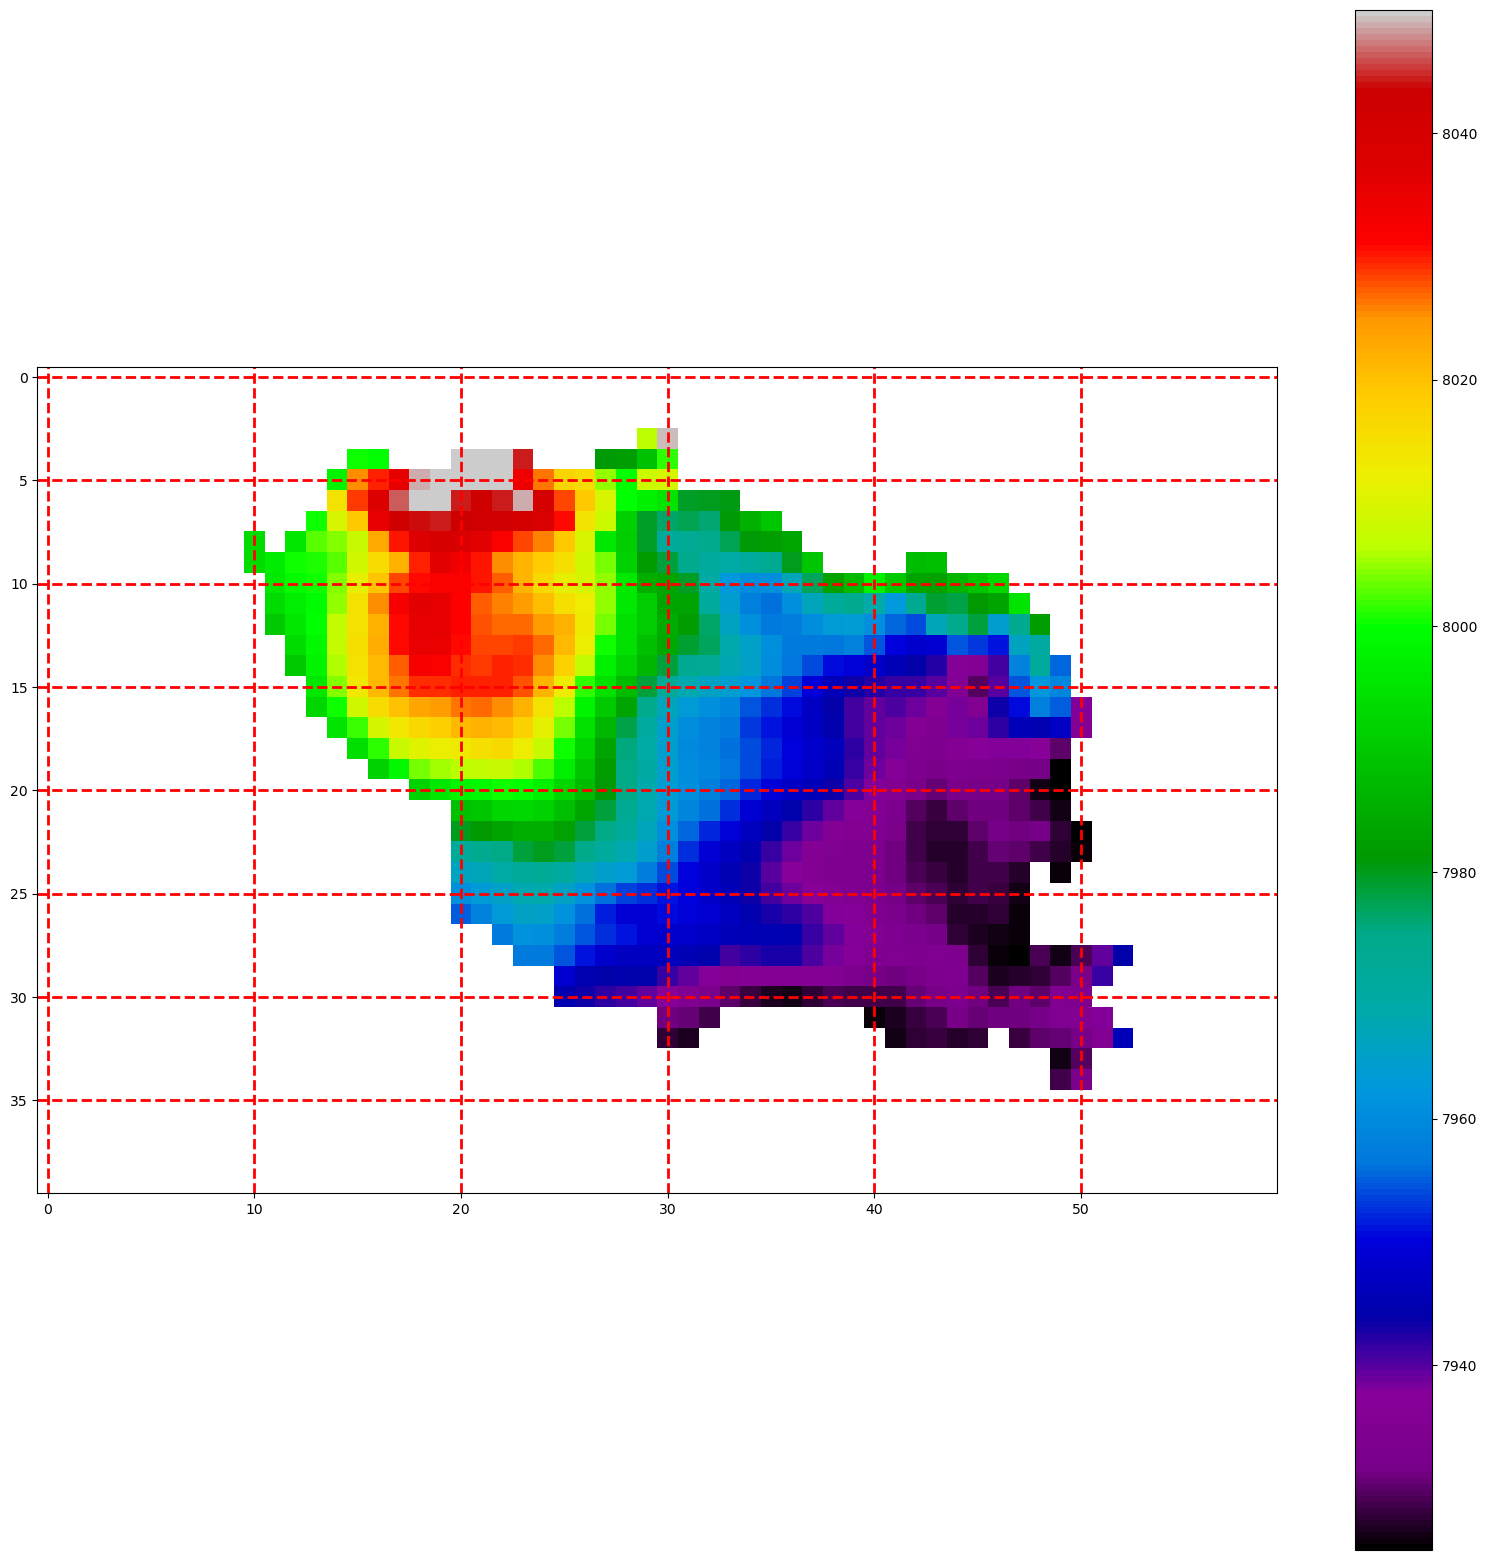

In [18]:
S1 = data_mom0[965:1005,1000:1060]
S1_1 = data_mom1[965:1005,1000:1060]
S1_cube = data_image[:,965:1005,1000:1060]
S1_mask = data_mask[:,965:1005,1000:1060]
S1_NHI = NHI[965:1005,1000:1060]

m = 40
l = 60
v = 188

S1_copy = np.copy(S1)
S1_copy_mom1 = np.copy(S1_1)
S1_copy_cube = np.copy(S1_cube)
S1_copy_mask = np.copy(S1_mask)

for i in range(0,m):
    for j in range(0,l):
        flag = False
        if S1_copy[i,j] != 0.0:
            
            if j < 10:
                if S1_copy_mom1[i,j] < 7970:
                    flag = True
                    
            if j< 20 and i > 15:
                if S1_copy_mom1[i,j] < 7970:
                    flag = True
                    
            if j > 30 and i < 10:
                if S1_copy_mom1[i,j] > 7990:
                    flag = True
            
            if j < 20:
                if S1_copy_mom1[i,j] < 7990:
                    flag = True
                    
            if j < 30 and i > 30:
                if S1_copy_mom1[i,j] < 7960:
                    flag = True
                
            
            if j < 25 and i > 25:
                if S1_copy_mom1[i,j] < 7955:
                    flag = True
           
            
        if flag:
            S1_copy[i,j] = 0.0
            S1_copy_mom1[i,j] = math.nan
        data_S1[0,i,j] = data_S1[0,i,j]/1000
        
print(HI_mass(data_S1))
            
                
cleanloop(S1_copy,S1_copy_mom1,S1_copy_cube,m,l,v,7925,8100,5)
for i in range(0,m):
    for j in range(0,l):
        if S1_copy[i,j] == 0.0:
            S1_copy[i,j] = 0.0
#S1_new_mask = createmask(S1_copy_mask,m,l,v)
print(HI_mass(S1_copy))
print(flux(S1_copy))
print(galNHI(S1_NHI))

            

plt.figure(figsize = (20,20))
plt.imshow(S1_copy_mom1, cmap='nipy_spectral', vmin=7925, vmax=8050)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

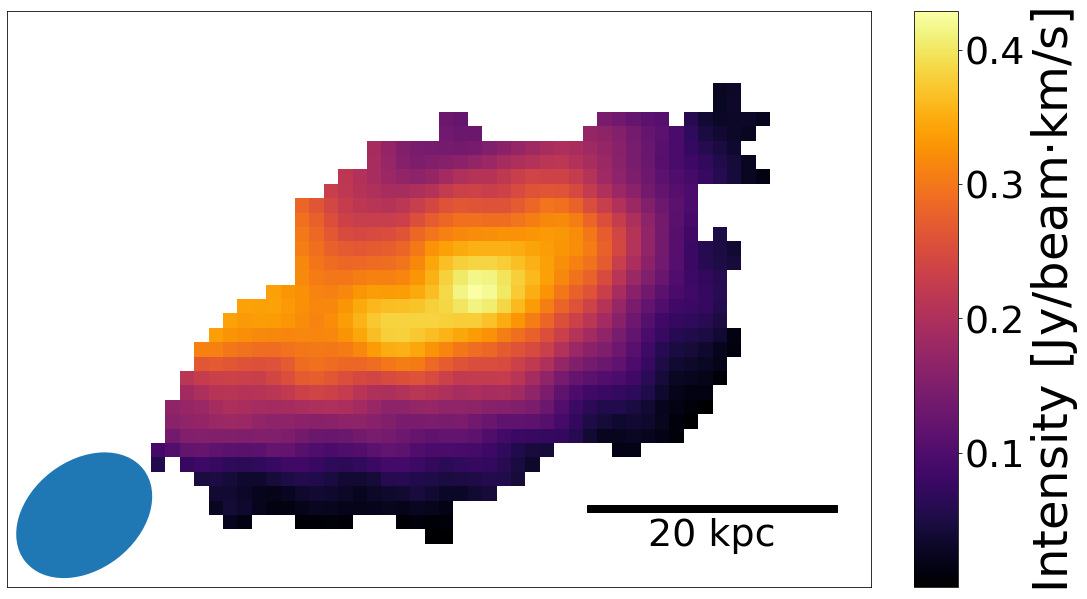

In [23]:
for i in range(0,40):
    for j in range(0,60):
        if S1_copy[i,j] == 0.0:
            S1_copy[i,j] = math.nan
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

plt.subplots_adjust(bottom=0.2, right=0.7, top=0.8, left = 0.1, wspace=0.0)
cbar_ax = fig.add_axes([0.73, 0.3, 0.03, 0.4])

cbar = plt.colorbar(im, cax=cbar_ax)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.009651728872789556, label = '20 kpc',fsize = 38)


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0S1.png', bbox_inches='tight')

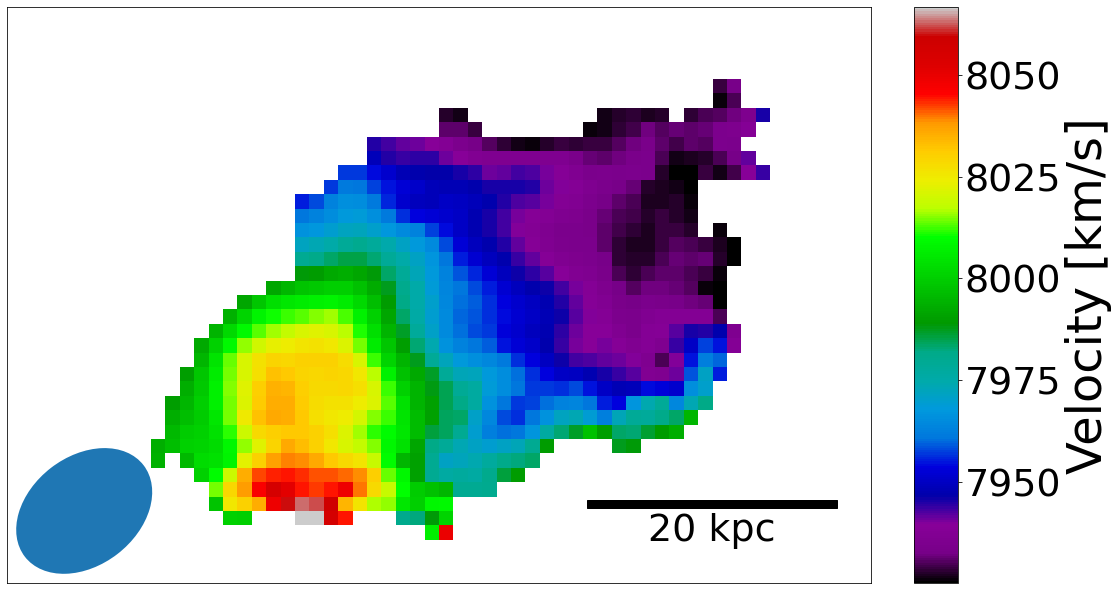

In [24]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1_copy_mom1, cmap='nipy_spectral')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
#cbar = plt.colorbar(im,fraction=0.046, pad=0.032)

plt.subplots_adjust(bottom=0.2, right=0.7, top=0.8, left = 0.1, wspace=0.0)
cbar_ax = fig.add_axes([0.73, 0.3, 0.03, 0.4])

cbar = plt.colorbar(im, cax=cbar_ax)

cbar.set_label(r"Velocity [km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.009651728872789556, label = '20 kpc',fsize = 38)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom1S1.png', bbox_inches='tight')

In [19]:
S1_disk = data_S1_disk[0,0:40, 30:90]
S1_lead = data_S1_lead[0,0:40, 30:90]
S1_follow = data_S1_follow[0,0:40, 30:90]

S1_disk_copy = np.copy(S1_disk)
S1_lead_copy = np.copy(S1_lead)
S1_follow_copy = np.copy(S1_follow)
S1_mom0_copy = np.copy(S1_copy)

m = 40
l = 60

for i in range(0,m):
    for j in range(0,l):
        if S1_copy[i,j] == 0:
            S1_mom0_copy[i,j] = math.nan
        if S1_disk[i,j] == 0:
            S1_disk_copy[i,j] = math.nan
        if S1_lead[i,j] == 0:
            S1_lead_copy[i,j] = math.nan
        if S1_follow[i,j] == 0:
            S1_follow_copy[i,j] = math.nan

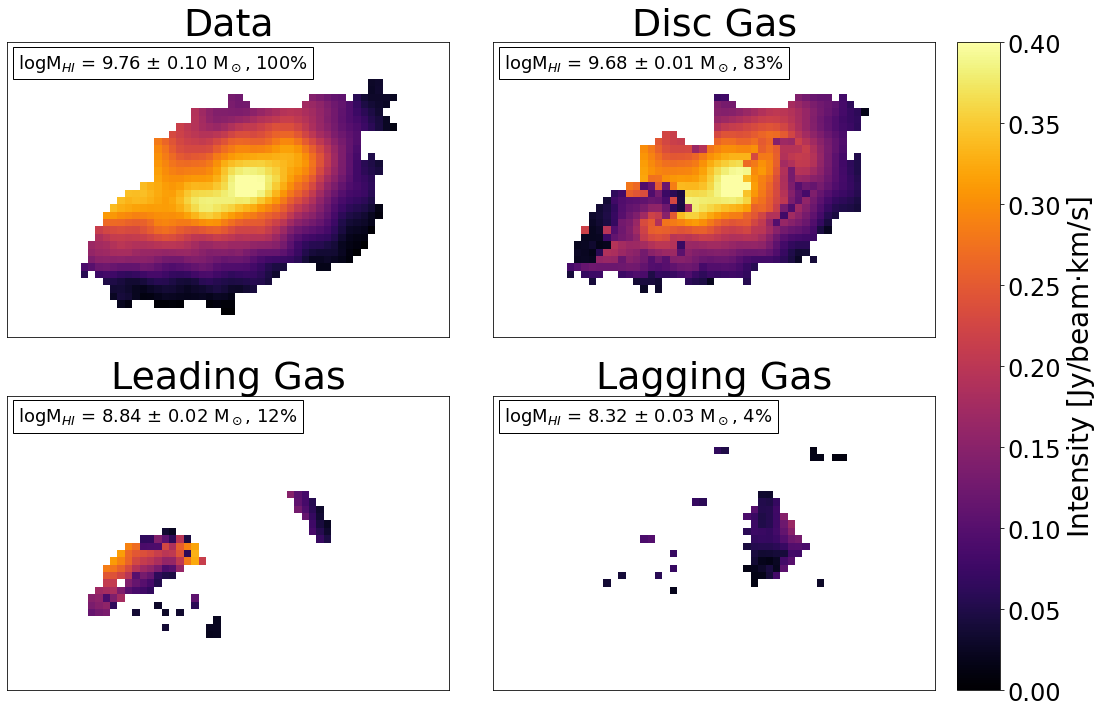

In [54]:
fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(221, projection= WCS(header_mom0))
im1 = ax1.imshow(S1_mom0_copy, cmap = 'inferno',vmin = 0, vmax = 0.4)
ax1.text(1, 36, r"logM$_{HI}$ = 9.76 $\pm$ 0.10 M$_\odot$, 100%", fontsize = 18, bbox={'facecolor': 'white', 'pad': 5})
ax1.set_title('Data',size=38)

ax2 = fig.add_subplot(222, projection= WCS(header_mom0))
im2 = ax2.imshow(S1_disk_copy, cmap = 'inferno',vmin = 0, vmax = 0.4)
ax2.text(1, 36, r"logM$_{HI}$ = 9.68 $\pm$ 0.01 M$_\odot$, 83%", fontsize = 18, bbox={'facecolor': 'white', 'pad': 5})
ax2.set_title('Disc Gas',size=38)

ax3 =fig.add_subplot(223,projection= WCS(header_mom0))
im3 = ax3.imshow(S1_lead_copy, cmap = 'inferno',vmin = 0, vmax = 0.4)
ax3.text(1, 36, r"logM$_{HI}$ = 8.84 $\pm$ 0.02 M$_\odot$, 12%", fontsize = 18, bbox={'facecolor': 'white', 'pad': 5})
ax3.set_title('Leading Gas',size=38)

ax4 = fig.add_subplot(224, projection= WCS(header_mom0))
im4 = ax4.imshow(S1_follow_copy, cmap = 'inferno',vmin = 0, vmax = 0.4)
ax4.text(1, 36, r"logM$_{HI}$ = 8.32 $\pm$ 0.03 M$_\odot$, 4%", fontsize = 18, bbox={'facecolor': 'white', 'pad': 5})
ax4.set_title('Lagging Gas',size=38)


lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax3.coords[0]
lat = ax3.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax4.coords[0]
lat = ax4.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.subplots_adjust(bottom=0.15, right=0.8, top=0.9, wspace=0.0000005)

cbar_ax = fig.add_axes([0.80, 0.15, 0.03, 0.75])

cbar = plt.colorbar(im1, cax=cbar_ax)
cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=28)
#cbar.ax.set_yticklabels(['0.0','', '0.1','', '0.2','', '0.3','', '0.4'])
cbar.ax.tick_params(labelsize=24)
plt.savefig('mom0_S1_comps_pres.png', bbox_inches='tight')

In [20]:
S3_disk = data_S3_disk[0,:, :]
S3_lead = data_S3_lead[0,:, :]
S3_follow = data_S3_follow[0,:, :]

S3_disk_copy = np.copy(S3_disk)
S3_lead_copy = np.copy(S3_lead)
S3_follow_copy = np.copy(S3_follow)
S3_mom0_copy = np.copy(S3_copy)

m = 100
l = 100

for i in range(0,m):
    for j in range(0,l):
        if S3_copy[i,j] == 0:
            S3_mom0_copy[i,j] = math.nan
        if S3_disk[i,j] == 0:
            S3_disk_copy[i,j] = math.nan
        if S3_lead[i,j] == 0:
            S3_lead_copy[i,j] = math.nan
        if S3_follow[i,j] == 0:
            S3_follow_copy[i,j] = math.nan

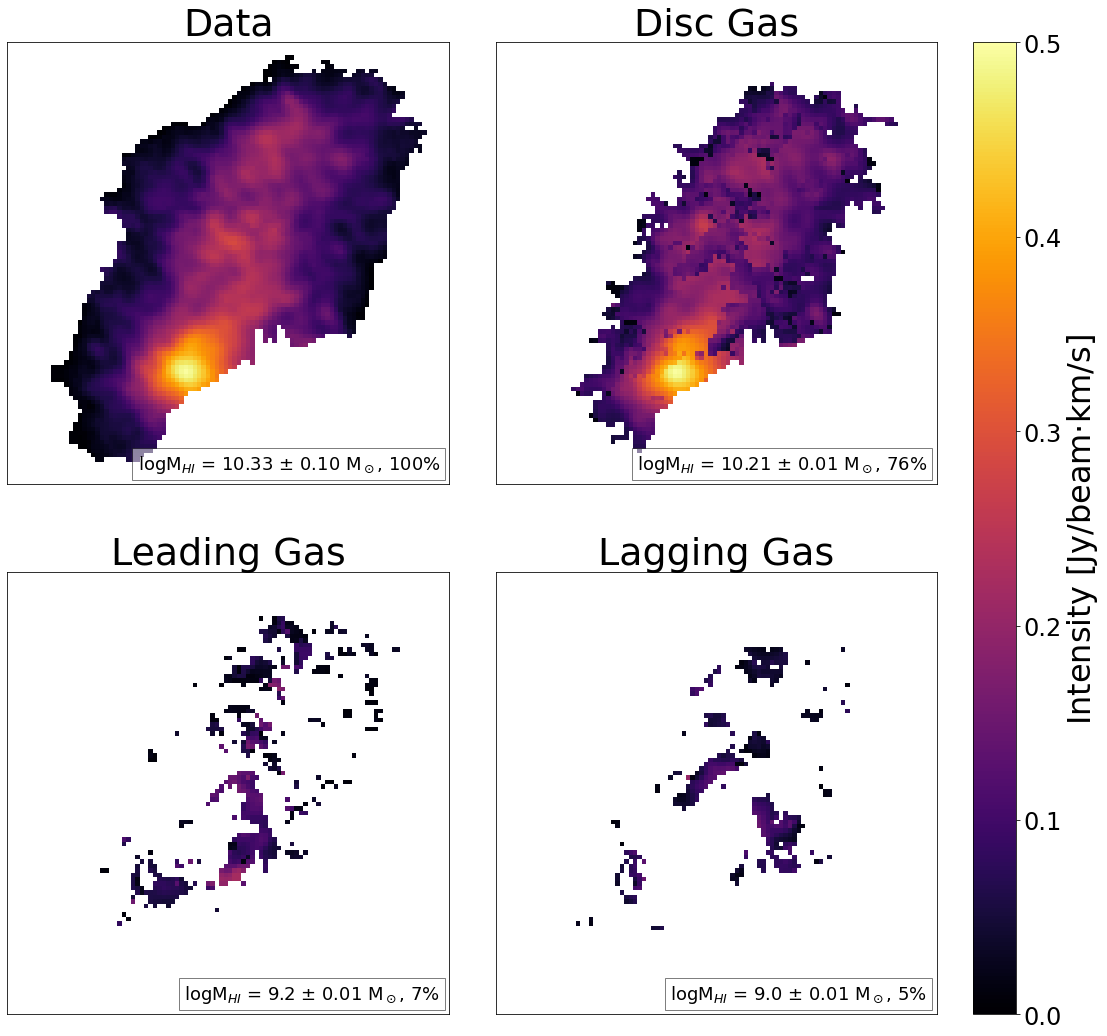

In [56]:
fig = plt.figure(figsize = (20,18))

ax1 = fig.add_subplot(221, projection= WCS(header_mom0))
im1 = ax1.imshow(S3_mom0_copy, cmap = 'inferno',vmin = 0, vmax = 0.5)
ax1.text(29, 3, r"logM$_{HI}$ = 10.33 $\pm$ 0.10 M$_\odot$, 100%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax1.set_title('Data',size=38)

ax2 = fig.add_subplot(222, projection= WCS(header_mom0))
im2 = ax2.imshow(S3_disk_copy, cmap = 'inferno',vmin = 0, vmax = 0.5)
ax2.text(31.5, 3, r"logM$_{HI}$ = 10.21 $\pm$ 0.01 M$_\odot$, 76%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax2.set_title('Disc Gas',size=38)

ax3 =fig.add_subplot(223,projection= WCS(header_mom0))
im3 = ax3.imshow(S3_lead_copy, cmap = 'inferno',vmin = 0, vmax = 0.5)
ax3.text(39.5, 3, r"logM$_{HI}$ = 9.2 $\pm$ 0.01 M$_\odot$, 7%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax3.set_title('Leading Gas',size=38)

ax4 = fig.add_subplot(224, projection= WCS(header_mom0))
im4 = ax4.imshow(S3_follow_copy, cmap = 'inferno',vmin = 0, vmax = 0.5)
ax4.text(39, 3, r"logM$_{HI}$ = 9.0 $\pm$ 0.01 M$_\odot$, 5%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax4.set_title('Lagging Gas',size=38)


lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax3.coords[0]
lat = ax3.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax4.coords[0]
lat = ax4.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.subplots_adjust(bottom=0.15, right=0.8, top=0.9, wspace=0.01)

cbar_ax = fig.add_axes([0.81, 0.15, 0.03, 0.75])

cbar = plt.colorbar(im1, cax=cbar_ax)
cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=32)
#cbar.ax.set_yticklabels(['0.0','', '0.1','', '0.2','', '0.3','', '0.4'])
cbar.ax.tick_params(labelsize=24)
plt.savefig('mom0_S3_comps_pres.png', bbox_inches='tight')

In [21]:
S2_disk = data_S2_disk[0,190:250, 120:180]
S2_lead = data_S2_lead[0,190:250, 120:180]
S2_follow = data_S2_follow[0,190:250, 120:180]

S2_disk_copy = np.copy(S2_disk)
S2_lead_copy = np.copy(S2_lead)
S2_follow_copy = np.copy(S2_follow)
S2_mom0_copy = np.copy(S2_copy)

m = 60
l = 60

for i in range(0,m):
    for j in range(0,l):
        if S2_copy[i,j] == 0:
            S2_mom0_copy[i,j] = math.nan
        if S2_disk[i,j] == 0:
            S2_disk_copy[i,j] = math.nan
        if S2_lead[i,j] == 0:
            S2_lead_copy[i,j] = math.nan
        if S2_follow[i,j] == 0:
            S2_follow_copy[i,j] = math.nan

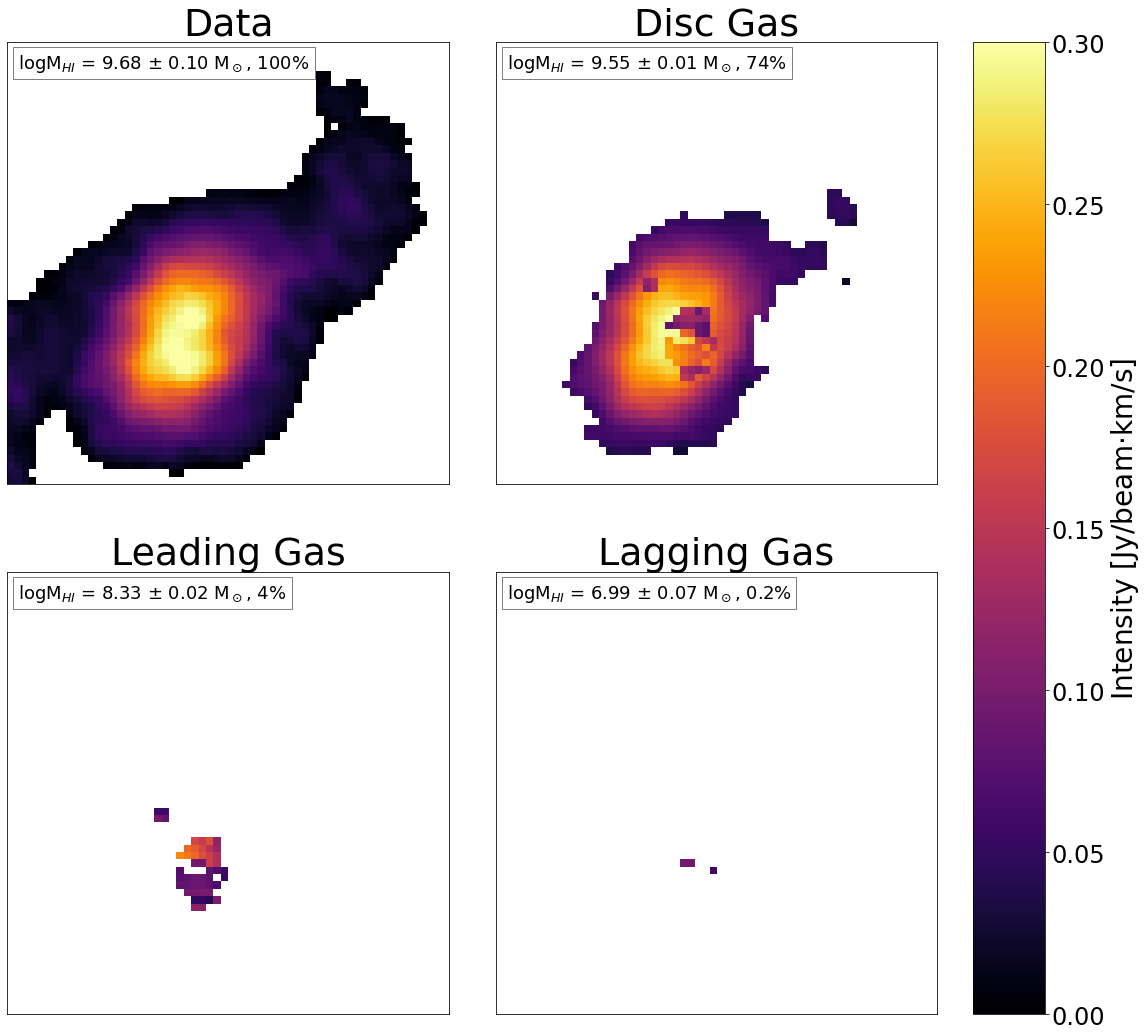

In [58]:
fig = plt.figure(figsize = (20,18))

ax1 = fig.add_subplot(221, projection= WCS(header_mom0))
im1 = ax1.imshow(S2_mom0_copy, cmap = 'inferno',vmin = 0, vmax = 0.3)
ax1.text(1, 56, r"logM$_{HI}$ = 9.68 $\pm$ 0.10 M$_\odot$, 100%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax1.set_title('Data',size=38)

ax2 = fig.add_subplot(222, projection= WCS(header_mom0))
im2 = ax2.imshow(S2_disk_copy, cmap = 'inferno',vmin = 0, vmax = 0.3)
ax2.text(1, 56, r"logM$_{HI}$ = 9.55 $\pm$ 0.01 M$_\odot$, 74%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax2.set_title('Disc Gas',size=38)

ax3 =fig.add_subplot(223,projection= WCS(header_mom0))
im3 = ax3.imshow(S2_lead_copy, cmap = 'inferno',vmin = 0, vmax = 0.3)
ax3.text(1, 56, r"logM$_{HI}$ = 8.33 $\pm$ 0.02 M$_\odot$, 4%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax3.set_title('Leading Gas',size=38)

ax4 = fig.add_subplot(224, projection= WCS(header_mom0))
im4 = ax4.imshow(S2_follow_copy, cmap = 'inferno',vmin = 0, vmax = 0.3)
ax4.text(1, 56, r"logM$_{HI}$ = 6.99 $\pm$ 0.07 M$_\odot$, 0.2%", fontsize = 18, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
ax4.set_title('Lagging Gas',size=38)


lon = ax1.coords[0]
lat = ax1.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax2.coords[0]
lat = ax2.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax3.coords[0]
lat = ax3.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

lon = ax4.coords[0]
lat = ax4.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.subplots_adjust(bottom=0.15, right=0.8, top=0.9, wspace=0.01)

cbar_ax = fig.add_axes([0.81, 0.15, 0.05, 0.75])

cbar = plt.colorbar(im1, cax=cbar_ax)
cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=28)
#cbar.ax.set_yticklabels(['0.0','', '0.1','', '0.2','', '0.3','', '0.4'])
cbar.ax.tick_params(labelsize=24)
plt.savefig('mom0_S2_comps_post.png', bbox_inches='tight')

starting cleanup
cleanup finished, starting noise reduction
noise reduction finished, cleaning cube
cube cleaned
9.03 $\pm$ 0.14  not log = 1068427104.96, 0.97
$ 2.64327 \pm 0.04 $  not log = 439.81
1.797605573309236e+20


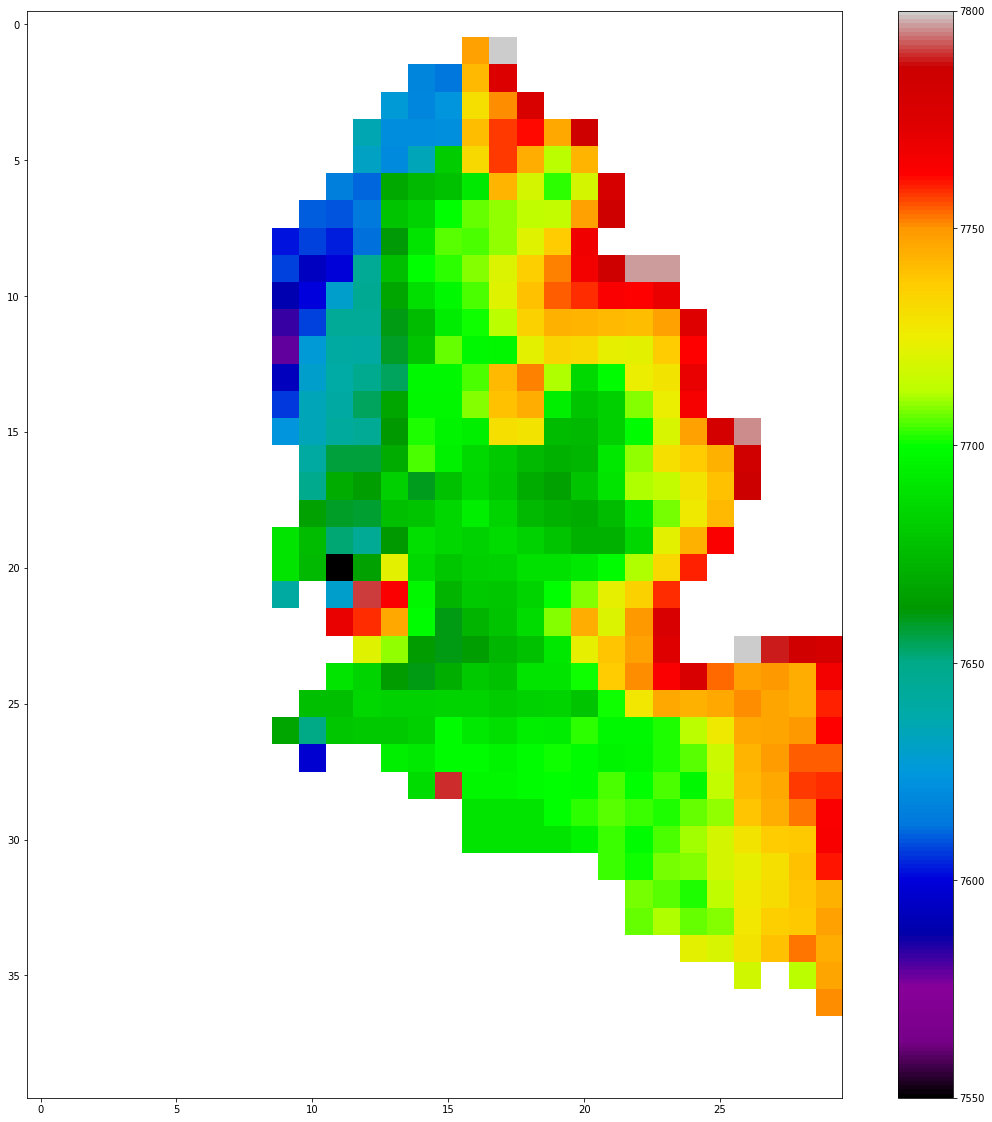

In [29]:
S7 = data_mom0[1005:1045,970:1000]
S7_1 = data_mom1[1005:1045,970:1000]
S7_cube = data_image[:,1005:1045,970:1000]
S7_NHI = NHI[1005:1045,970:1000]

m = 40
l = 30
v = 188

S7_copy = np.copy(S7)
S7_copy_mom1 = np.copy(S7_1)
S7_copy_cube = np.copy(S7_cube)

cleanloop(S7_copy,S7_copy_mom1,S7_copy_cube,m,l,v,7550,7800,5,nan = False)

for i in range(0,m):
    for j in range(0,l):
        if S7_copy[i,j] == 0.0:
            S7_copy[i,j] = 0.0

print(HI_mass(S7_copy))
print(flux(S7_copy))
print(galNHI(S7_NHI))
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.004825864436394778, label = '10 kpc',fsize = 18)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')


plt.figure(figsize = (20,20))
plt.imshow(S7_copy_mom1, cmap='nipy_spectral', vmin=7550, vmax=7800)
plt.colorbar()
#plt.grid(color='r', linestyle='--', linewidth=2)

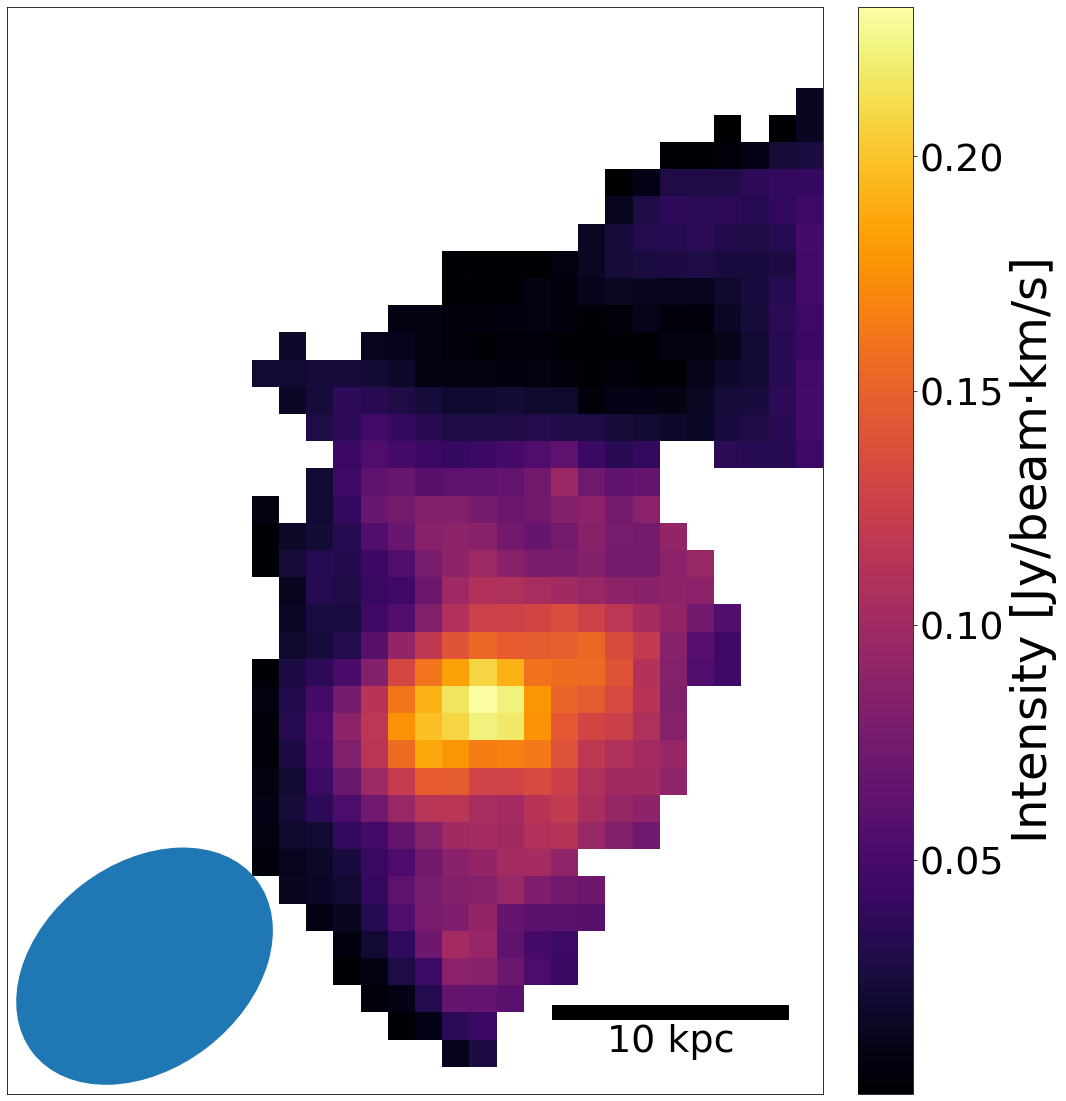

In [26]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S7_copy, cmap='inferno')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.06, pad=0.032)

cbar.set_label(r"Intensity [Jy/beam$\cdot$km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.004825864436394778, label = '10 kpc',fsize = 38)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom0S7.png', bbox_inches='tight')

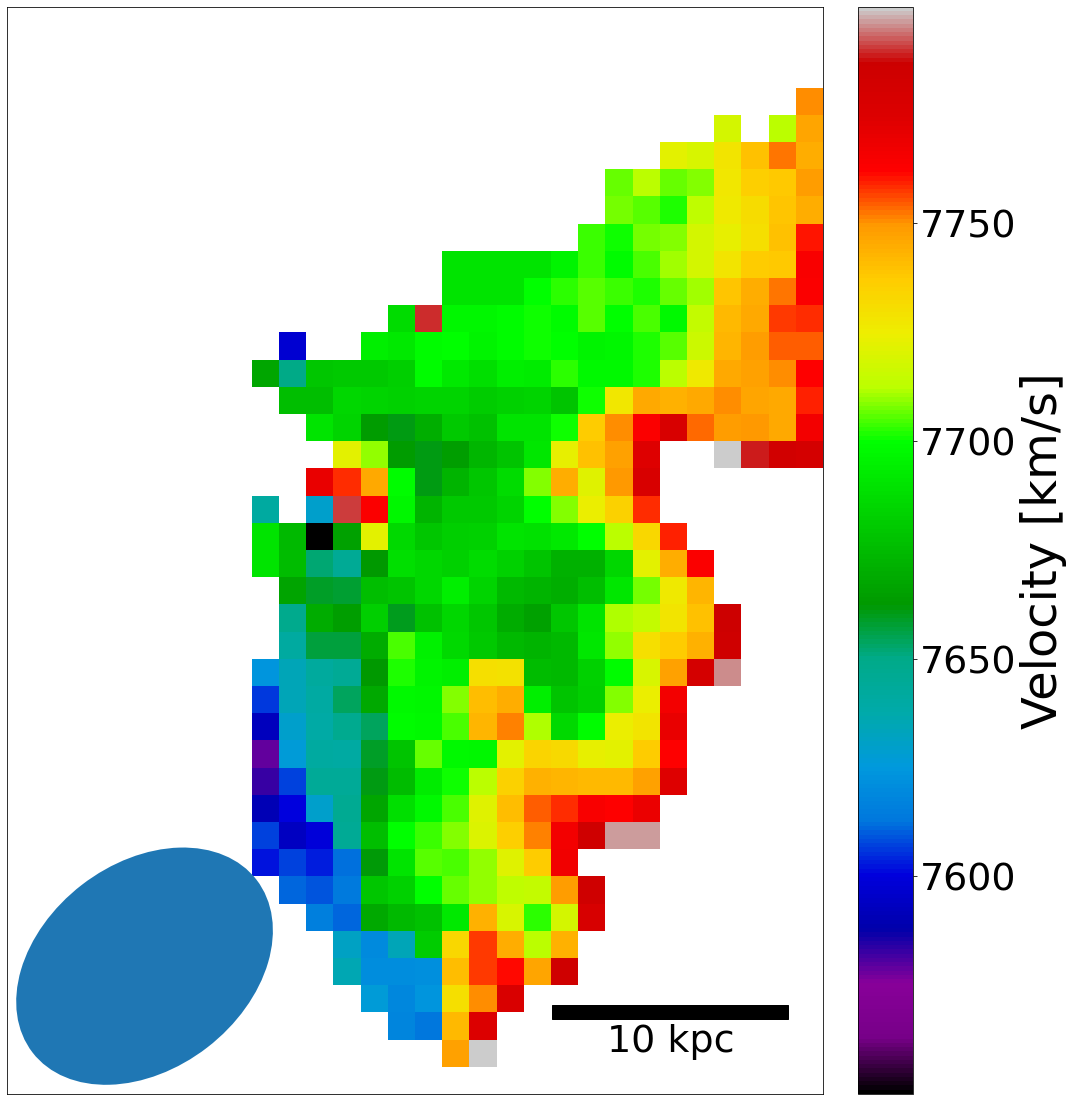

In [27]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S7_copy_mom1, cmap='nipy_spectral')
#ax.invert_yaxis()
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
cbar = plt.colorbar(im,fraction=0.06, pad=0.032)

cbar.set_label(r"Velocity [km/s]", size=48)
cbar.ax.tick_params(labelsize=38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.004825864436394778, label = '10 kpc',fsize = 38)

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('mom1S7.png', bbox_inches='tight')

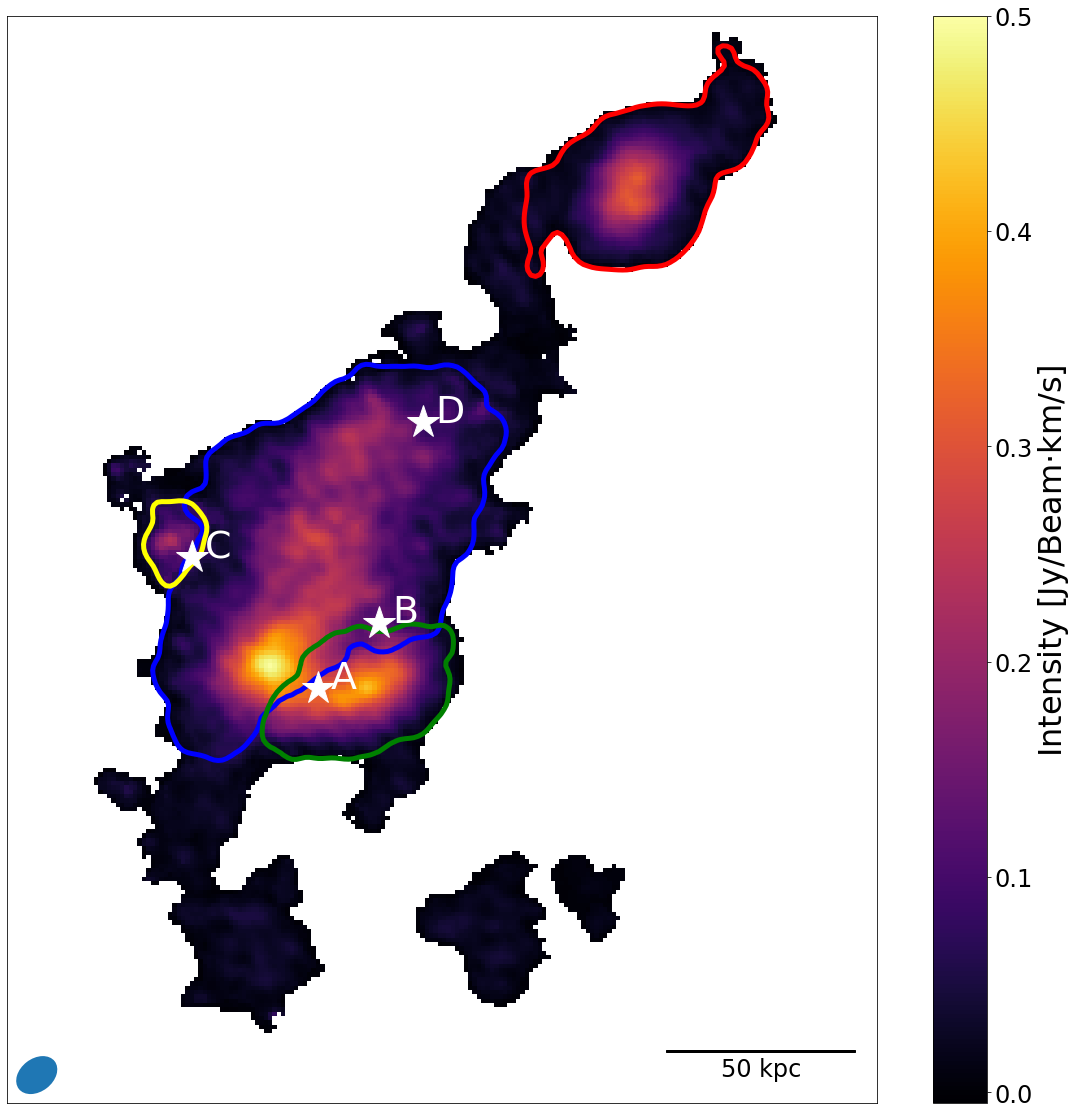

In [89]:
S1_mom0 = np.empty_like(S1237_copy)
S2_mom0 = np.empty_like(S1237_copy)
S3_mom0 = np.empty_like(S1237_copy)
S7_mom0 = np.empty_like(S1237_copy)
#S1237 = data_mom0[890:1140,950:1150]
#S1 = data_mom0[965:1005,1000:1060] #S1 dims
#S2 = data_mom0[1080:1140,1070:1130]
#S3 = data_mom0[965:1065,970:1070] #S3 dims
#S7 = data_mom0[1005:1045,970:1000]
#full = [0,   250, 0,   200]
#S1 =   [75,  115, 50,  110]
#S2 =   [190, 250, 120, 180]
#S3 =   [75,  175, 20,  120]
#S7 =   [115, 155, 20,  50] 

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S2_mom0[j,i] = 0.0
        S3_mom0[j,i] = 0.0
        S7_mom0[j,i] = 0.0
            
        if i >= 50 and j < 115 and i < 110 and j >= 75:
            S1_mom0[j,i] = S1_copy[j-75,i-50]
        if i >= 120 and j < 250 and i < 180 and j>=190:
            S2_mom0[j,i] = S2_copy[j-190,i-120]
        if i >= 20 and j < 175 and i < 120 and j >= 75:
            S3_mom0[j,i] = S3_copy[j-75,i-20]
        if i >= 20 and j < 155 and i < 50 and j >= 115:
            S7_mom0[j,i] = S7_copy[j-115,i-20]   
        if S1237_copy[j,i] == 0.0:
            S1237_copy[j,i] = math.nan
            

sigma = 1.5
S1_mom0 = gaussian_filter(S1_mom0, sigma)
S2_mom0 = gaussian_filter(S2_mom0, sigma)
S3_mom0 = gaussian_filter(S3_mom0, sigma)
S7_mom0 = gaussian_filter(S7_mom0, sigma)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'inferno',vmin = -0.005, vmax = 0.5) #
#ax.invert_yaxis()
#ax.xaxis.set_tick_params(labelbottom=False)
#ax.yaxis.set_tick_params(labelleft=False)

cbar = plt.colorbar(im)

#ax.contour(S2_mom0, levels=np.logspace(-2, 0, 1), colors = 'tab:green',linewidths = 2)
#ax.contour(S3_mom0, levels=np.logspace(-1.5, 0, 1), colors = 'blue',linewidths = 2)
#ax.contour(S1_mom0, levels=np.logspace(-1.5, 0, 1), colors = 'tab:olive',linewidths = 2)
#ax.contour(S7_mom0, levels=np.logspace(-1.3, 0, 1), colors = 'tab:orange',linewidths = 2)
#ax.contour(S1237_copy_mom1,levels=np.linspace(7550,8100,20), cmap = 'nipy_spectral')

ax.contour(S2_mom0, levels=[0.01], colors = 'red',linewidths = 5)
ax.contour(S3_mom0, levels=[0.01], colors = 'blue',linewidths = 5)
ax.contour(S1_mom0, levels=[0.01], colors = 'green',linewidths = 5)
ax.contour(S7_mom0, levels=[0.05], colors = 'yellow',linewidths = 5)

ax.plot(51+20,20+75, '*w', markersize=34)
ax.plot(65+20,35+75, '*w', markersize=34)
ax.plot(22+20,50+75, '*w', markersize=34)
ax.plot(75+20,81+75, '*w', markersize=34)

ax.text(54+20,20+75, 'A',  color = 'w', fontsize = 38)
ax.text(68+20,35+75, 'B',  color = 'w', fontsize = 38)
ax.text(25+20,50+75, 'C',  color = 'w', fontsize = 38)
ax.text(78+20,81+75, 'D',  color = 'w', fontsize = 38)
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 24)

cbar.set_label(r"Intensity [Jy/Beam$\cdot$km/s]", size=32)
cbar.ax.tick_params(labelsize=24)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
#print(np.logspace(-1.5, 0, 1))
#print(np.logspace(-1.3, 0, 1))
#print(np.logspace(-2, 0, 1))

plt.savefig('spectra_S1237_pres.png', bbox_inches='tight')

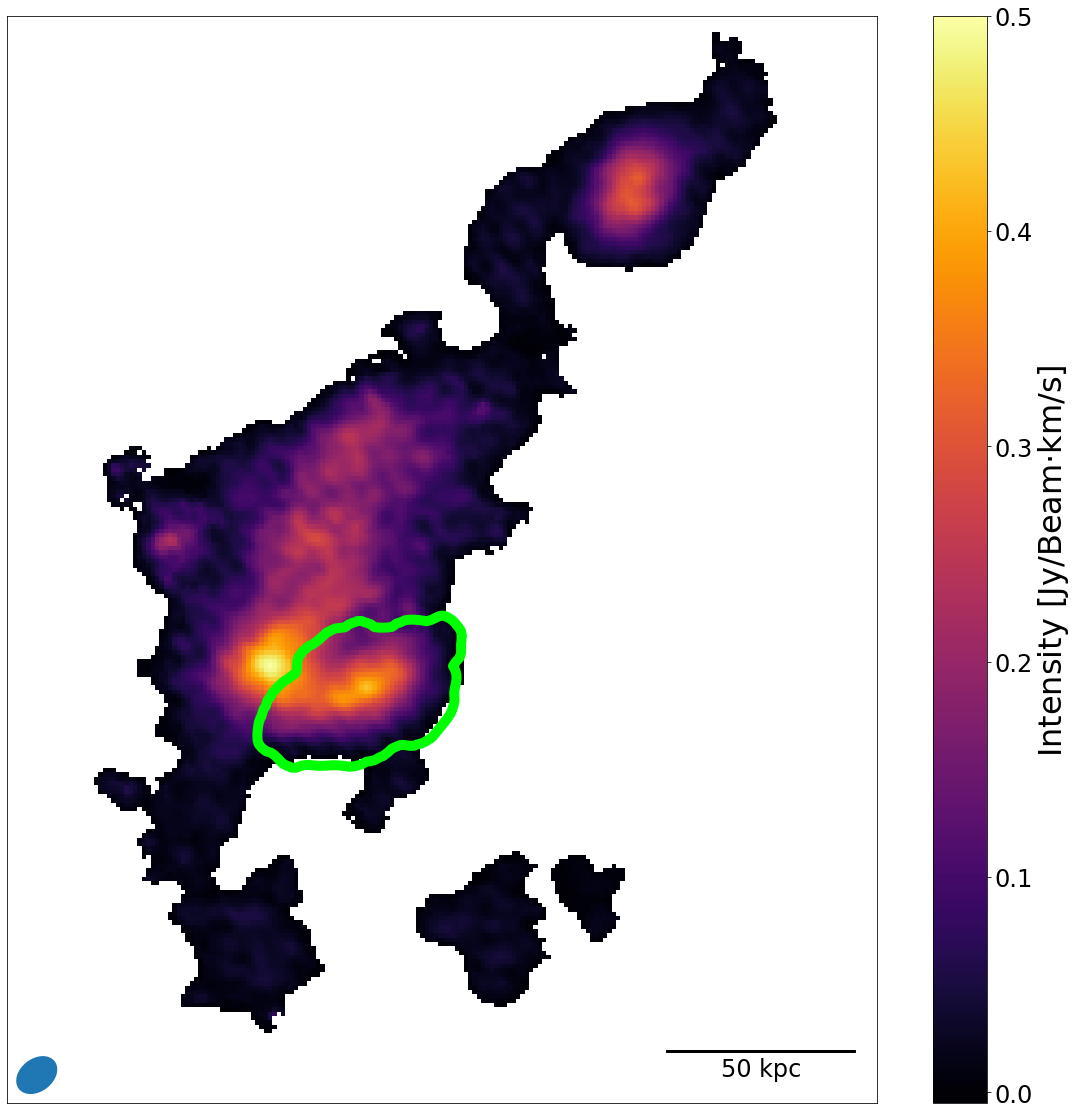

In [94]:
import matplotlib.patheffects as fx
S1_mom0 = np.empty_like(S1237_copy)
S2_mom0 = np.empty_like(S1237_copy)
S3_mom0 = np.empty_like(S1237_copy)
S7_mom0 = np.empty_like(S1237_copy)
#S1237 = data_mom0[890:1140,950:1150]
#S1 = data_mom0[965:1005,1000:1060] #S1 dims
#S2 = data_mom0[1080:1140,1070:1130]
#S3 = data_mom0[965:1065,970:1070] #S3 dims
#S7 = data_mom0[1005:1045,970:1000]
#full = [0,   250, 0,   200]
#S1 =   [75,  115, 50,  110]
#S2 =   [190, 250, 120, 180]
#S3 =   [75,  175, 20,  120]
#S7 =   [115, 155, 20,  50] 

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S2_mom0[j,i] = 0.0
        S3_mom0[j,i] = 0.0
        S7_mom0[j,i] = 0.0
            
        if i >= 50 and j < 115 and i < 110 and j >= 75:
            S1_mom0[j,i] = S1_copy[j-75,i-50]
        if i >= 120 and j < 250 and i < 180 and j>=190:
            S2_mom0[j,i] = S2_copy[j-190,i-120]
        if i >= 20 and j < 175 and i < 120 and j >= 75:
            S3_mom0[j,i] = S3_copy[j-75,i-20]
        if i >= 20 and j < 155 and i < 50 and j >= 115:
            S7_mom0[j,i] = S7_copy[j-115,i-20]   
        if S1237_copy[j,i] == 0.0:
            S1237_copy[j,i] = math.nan
            

sigma = 1.25
S1_mom0 = gaussian_filter(S1_mom0, sigma)
S2_mom0 = gaussian_filter(S2_mom0, sigma)
S3_mom0 = gaussian_filter(S3_mom0, sigma)
S7_mom0 = gaussian_filter(S7_mom0, sigma)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy, cmap = 'inferno',vmin = -0.005, vmax = 0.5) #
#ax.invert_yaxis()
#ax.xaxis.set_tick_params(labelbottom=False)
#ax.yaxis.set_tick_params(labelleft=False)

cbar = plt.colorbar(im)

#ax.contour(S2_mom0, levels=np.logspace(-2, 0, 1), colors = 'tab:green',linewidths = 2)
#ax.contour(S3_mom0, levels=np.logspace(-1.5, 0, 1), colors = 'blue',linewidths = 2)
#ax.contour(S1_mom0, levels=np.logspace(-1.5, 0, 1), colors = 'tab:olive',linewidths = 2)
#ax.contour(S7_mom0, levels=np.logspace(-1.3, 0, 1), colors = 'tab:orange',linewidths = 2)
#ax.contour(S1237_copy_mom1,levels=np.linspace(7550,8100,20), cmap = 'nipy_spectral')

#ax.contour(S2_mom0, levels=[0.001], colors = 'red',linewidths = 5)
#ax.contour(S3_mom0, levels=[0.001], colors = 'blue',linewidths = 5)
ax.contour(S1_mom0, levels=[0.001], colors = 'lime',linewidths = 10)
#ax.contour(S7_mom0, levels=[0.005], colors = 'yellow',linewidths = 5)

#ax.plot(51+20,20+75, '*w', markersize=34)
#ax.plot(65+20,35+75, '*w', markersize=34)
#ax.plot(22+20,50+75, '*w', markersize=34)
#ax.plot(75+20,81+75, '*w', markersize=34)

#S1_text = ax.text(78+20,81+75, 'S1',  color = 'b', fontsize = 38)
#S1_text.set_path_effects([fx.Stroke(linewidth=3, foreground='1.0'),fx.Normal()])
#S2_text = ax.text(140+20,145+75, 'S2',  color = 'r', fontsize = 38)
#S2_text.set_path_effects([fx.Stroke(linewidth=3, foreground='1.0'),fx.Normal()])
#S3_text = ax.text(64+20,10+75, 'S3',  color = 'g', fontsize = 38)
#S3_text.set_path_effects([fx.Stroke(linewidth=3, foreground='1.0'),fx.Normal()])
#S7_text = ax.text(20+20,65+75, 'S7',  color = 'y', fontsize = 38)
#S7_text.set_path_effects([fx.Stroke(linewidth=3, foreground='1.0'),fx.Normal()])
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 24)

cbar.set_label(r"Intensity [Jy/Beam$\cdot$km/s]", size=32)
cbar.ax.tick_params(labelsize=24)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')
#print(np.logspace(-1.5, 0, 1))
#print(np.logspace(-1.3, 0, 1))
#print(np.logspace(-2, 0, 1))

plt.savefig('cuts_mom0_pres_S3.png', bbox_inches='tight')

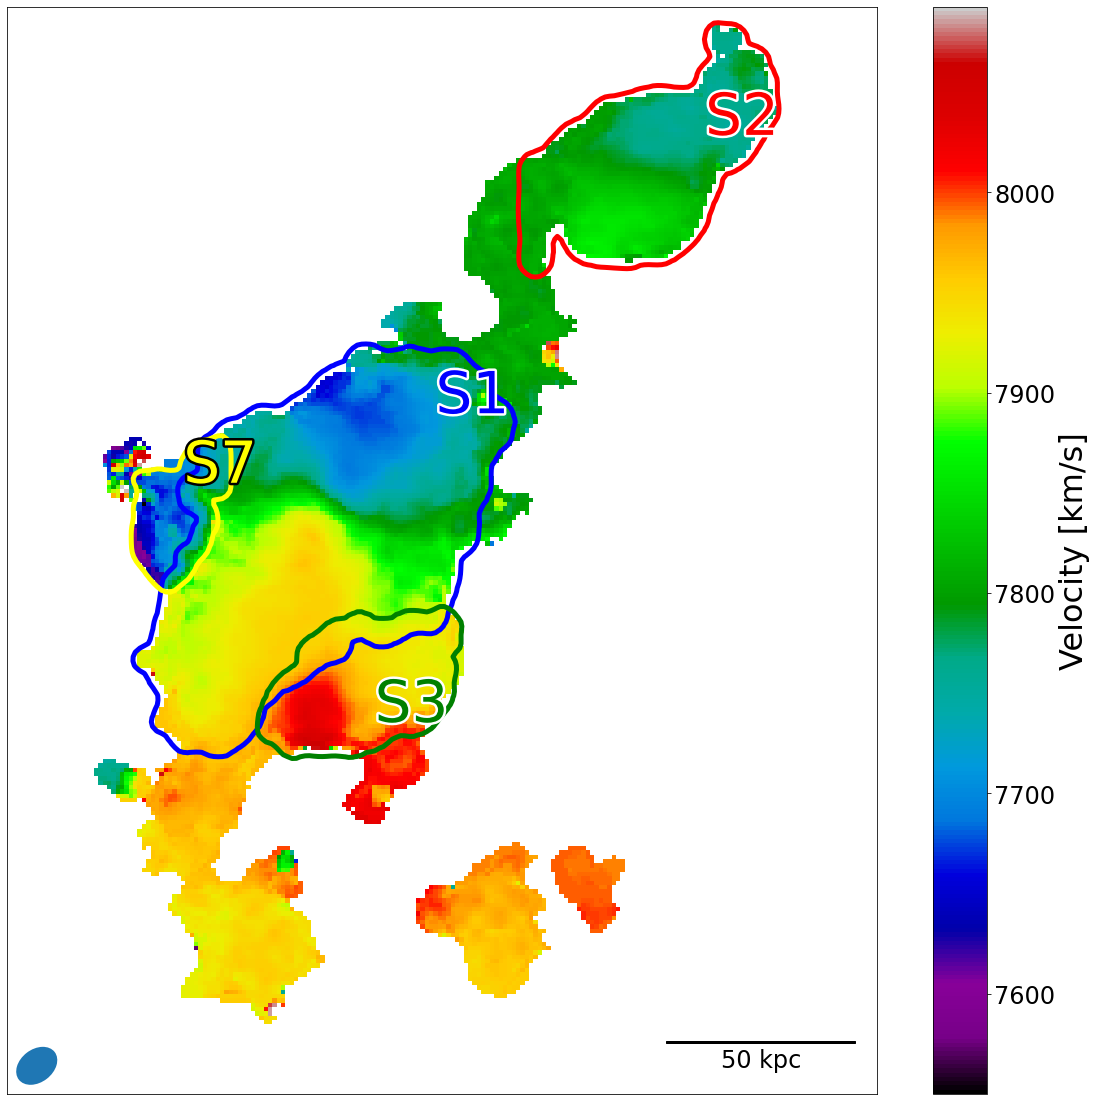

In [52]:
import matplotlib.patheffects as fx
S1_mom0 = np.empty_like(S1237_copy)
S2_mom0 = np.empty_like(S1237_copy)
S3_mom0 = np.empty_like(S1237_copy)
S7_mom0 = np.empty_like(S1237_copy)

for i in range(0,200):
    for j in range(0,250): 
        
        S1_mom0[j,i] = 0.0
        S2_mom0[j,i] = 0.0
        S3_mom0[j,i] = 0.0
        S7_mom0[j,i] = 0.0
            
        if i >= 50 and j < 115 and i < 110 and j >= 75:
            S1_mom0[j,i] = S1_copy[j-75,i-50]
        if i >= 120 and j < 250 and i < 180 and j>=190:
            S2_mom0[j,i] = S2_copy[j-190,i-120]
        if i >= 20 and j < 175 and i < 120 and j >= 75:
            S3_mom0[j,i] = S3_copy[j-75,i-20]
        if i >= 20 and j < 155 and i < 50 and j >= 115:
            S7_mom0[j,i] = S7_copy[j-115,i-20]   
        if S1237_copy[j,i] == 0.0:
            S1237_copy[j,i] = math.nan
            

sigma = 1.25
S1_mom0 = gaussian_filter(S1_mom0, sigma)
S2_mom0 = gaussian_filter(S2_mom0, sigma)
S3_mom0 = gaussian_filter(S3_mom0, sigma)
S7_mom0 = gaussian_filter(S7_mom0, sigma)

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection= WCS(header_mom0))
im = ax.imshow(S1237_copy_mom1, cmap = 'nipy_spectral') #
cbar = plt.colorbar(im)

ax.contour(S2_mom0, levels=[0.001], colors = 'red',linewidths = 5)
ax.contour(S3_mom0, levels=[0.001], colors = 'blue',linewidths = 5)
ax.contour(S1_mom0, levels=[0.001], colors = 'green',linewidths = 5)
ax.contour(S7_mom0, levels=[0.005], colors = 'yellow',linewidths = 5)

S1_text = ax.text(78+20,81+75, 'S1',  color = 'b', fontsize = 58)
S1_text.set_path_effects([fx.Stroke(linewidth=5, foreground='1.0'),fx.Normal()])
S2_text = ax.text(140+20,145+75, 'S2',  color = 'r', fontsize = 58)
S2_text.set_path_effects([fx.Stroke(linewidth=5, foreground='1.0'),fx.Normal()])
S3_text = ax.text(64+20,10+75, 'S3',  color = 'g', fontsize = 58)
S3_text.set_path_effects([fx.Stroke(linewidth=5, foreground='1.0'),fx.Normal()])
S7_text = ax.text(20+20,65+75, 'S7',  color = 'yellow', fontsize = 58)
S7_text.set_path_effects([fx.Stroke(linewidth=5, foreground='0.0'),fx.Normal()])
add_beam(ax, header = header_mom0)
add_scalebar(ax, 0.02412932218197389, label = '50 kpc',fsize = 24)

cbar.set_label(r"Velocity [km/s]", size=32)
cbar.ax.tick_params(labelsize=24)
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_ticks_visible(False)
lon.set_ticklabel_visible(False)
lat.set_ticks_visible(False)
lat.set_ticklabel_visible(False)
lon.set_axislabel('')
lat.set_axislabel('')

plt.savefig('cuts_mom1_pres.png', bbox_inches='tight')